# Analysis EEG Data - Traumschreiber

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import mne

In [2]:
# Matplotlib font size
plt.rcParams.update({'font.size': 12})

## Loading EEG data & subject removal
Subjects 6, 10, 11, 13 and 14 are excluded from analysis because they did not show enough mind wandering episodes during the experiment (number of MW episodes < 10).

In [3]:
subjects = [1,2,3,4,5,7,8,9,12,15]

eeg_files = {'sub1_1' : '../Data/sub1/29-01-2020_10-33_sub1_EEG_1.csv',
             'sub1_2' : '../Data/sub1/29-01-2020_10-55_sub1_EEG_2.csv',
             'sub1_3' : '../Data/sub1/29-01-2020_11-16_sub1_EEG_3.csv',
             'sub2_1' : '../Data/sub2/29-01-2020_14-39_sub2_EEG_1.csv',
             'sub2_2' : '../Data/sub2/29-01-2020_14-59_sub2_EEG_3.csv',
             'sub2_3' : '../Data/sub2/29-01-2020_15-22_sub2_EEG_1.csv',
             'sub3_1' : '../Data/sub3/30-01-2020_11-27_sub3_EEG_1.csv',
             'sub3_2' : '../Data/sub3/30-01-2020_11-50_sub3_EEG_1.csv',
             'sub3_3' : '../Data/sub3/30-01-2020_12-11_sub3_EEG_2.csv',
             'sub4_1' : '../Data/sub4/31-01-2020_11-24_sub4_EEG_1.csv',
             'sub4_2' : '../Data/sub4/31-01-2020_11-47_sub4_EEG_2.csv',
             'sub4_3' : '../Data/sub4/31-01-2020_12-09_sub4_EEG_3.csv',
             'sub5_1' : '../Data/sub5/31-01-2020_14-26_sub5_EEG_1.csv',
             'sub5_2' : '../Data/sub5/31-01-2020_14-48_sub5_EEG_2.csv',
             'sub5_3' : '../Data/sub5/31-01-2020_15-09_sub5_EEG_3.csv',
             'sub7_1' : '../Data/sub7/01-02-2020_12-28_sub7_EEG_1.csv',
             'sub7_2' : '../Data/sub7/01-02-2020_12-51_sub7_EEG_2.csv',
             'sub7_3' : '../Data/sub7/01-02-2020_13-14_sub7_EEG_3.csv',
             'sub8_1' : '../Data/sub8/01-02-2020_14-49_sub8_EEG_1.csv',
             'sub8_2' : '../Data/sub8/01-02-2020_15-11_sub8_EEG_2.csv',
             'sub8_3' : '../Data/sub8/01-02-2020_15-32_sub8_EEG_3.csv',
             'sub9_1' : '../Data/sub9/01-02-2020_16-42_sub9_EEG_1.csv',
             'sub9_2' : '../Data/sub9/01-02-2020_17-05_sub9_EEG_2.csv',
             'sub9_3' : '../Data/sub9/01-02-2020_17-28_sub9_EEG_3.csv',
             'sub12_1' : '../Data/sub12/03-02-2020_13-17_sub12_EEG_1.csv',
             'sub12_2' : '../Data/sub12/03-02-2020_13-39_sub12_EEG_2.csv',
             'sub12_3' : '../Data/sub12/03-02-2020_14-00_sub12_EEG_3.csv',
             'sub15_1' : '../Data/sub15/04-02-2020_18-23_sub15_EEG_1.csv',
             'sub15_2' : '../Data/sub15/04-02-2020_18-45_sub15_EEG_2.csv',
             'sub15_3' : '../Data/sub15/04-02-2020_19-08_sub15_EEG_3.csv',
            }

aud_files = {'sub1_1' : '../Data/sub1/29-01-2020_10-33_sub1_auditory_1.csv',
             'sub1_2' : '../Data/sub1/29-01-2020_10-55_sub1_auditory_2.csv',
             'sub1_3' : '../Data/sub1/29-01-2020_11-16_sub1_auditory_3.csv',
             'sub2_1' : '../Data/sub2/29-01-2020_14-39_sub2_auditory_1.csv',
             'sub2_2' : '../Data/sub2/29-01-2020_14-59_sub2_auditory_3.csv',
             'sub2_3' : '../Data/sub2/29-01-2020_15-22_sub2_auditory_1.csv',
             'sub3_1' : '../Data/sub3/30-01-2020_11-27_sub3_auditory_1.csv',
             'sub3_2' : '../Data/sub3/30-01-2020_11-50_sub3_auditory_1.csv',
             'sub3_3' : '../Data/sub3/30-01-2020_12-11_sub3_auditory_2.csv',
             'sub4_1' : '../Data/sub4/31-01-2020_11-24_sub4_auditory_1.csv',
             'sub4_2' : '../Data/sub4/31-01-2020_11-47_sub4_auditory_2.csv',
             'sub4_3' : '../Data/sub4/31-01-2020_12-09_sub4_auditory_3.csv',
             'sub5_1' : '../Data/sub5/31-01-2020_14-26_sub5_auditory_1.csv',
             'sub5_2' : '../Data/sub5/31-01-2020_14-48_sub5_auditory_2.csv',
             'sub5_3' : '../Data/sub5/31-01-2020_15-09_sub5_auditory_3.csv',
             'sub7_1' : '../Data/sub7/01-02-2020_12-28_sub7_auditory_1.csv',
             'sub7_2' : '../Data/sub7/01-02-2020_12-51_sub7_auditory_2.csv',
             'sub7_3' : '../Data/sub7/01-02-2020_13-14_sub7_auditory_3.csv',
             'sub8_1' : '../Data/sub8/01-02-2020_14-49_sub8_auditory_1.csv',
             'sub8_2' : '../Data/sub8/01-02-2020_15-11_sub8_auditory_2.csv',
             'sub8_3' : '../Data/sub8/01-02-2020_15-32_sub8_auditory_3.csv',
             'sub9_1' : '../Data/sub9/01-02-2020_16-42_sub9_auditory_1.csv',
             'sub9_2' : '../Data/sub9/01-02-2020_17-05_sub9_auditory_2.csv',
             'sub9_3' : '../Data/sub9/01-02-2020_17-28_sub9_auditory_3.csv',
             'sub12_1' : '../Data/sub12/03-02-2020_13-17_sub12_auditory_1.csv',
             'sub12_2' : '../Data/sub12/03-02-2020_13-39_sub12_auditory_2.csv',
             'sub12_3' : '../Data/sub12/03-02-2020_14-00_sub12_auditory_3.csv',
             'sub15_1' : '../Data/sub15/04-02-2020_18-23_sub15_auditory_1.csv',
             'sub15_2' : '../Data/sub15/04-02-2020_18-45_sub15_auditory_2.csv',
             'sub15_3' : '../Data/sub15/04-02-2020_19-08_sub15_auditory_3.csv',
            }

mw_files = {'sub1_1' : '../Data/sub1/29-01-2020_10-33_sub1_mw_1.csv',
            'sub1_2' : '../Data/sub1/29-01-2020_10-55_sub1_mw_2.csv',
            'sub1_3' : '../Data/sub1/29-01-2020_11-16_sub1_mw_3.csv',
            'sub2_1' : '../Data/sub2/29-01-2020_14-39_sub2_mw_1.csv',
            'sub2_2' : '../Data/sub2/29-01-2020_14-59_sub2_mw_3.csv',
            'sub2_3' : '../Data/sub2/29-01-2020_15-22_sub2_mw_1.csv',
            'sub3_1' : '../Data/sub3/30-01-2020_11-27_sub3_mw_1.csv',
            'sub3_2' : '../Data/sub3/30-01-2020_11-50_sub3_mw_1.csv',
            'sub3_3' : '../Data/sub3/30-01-2020_12-11_sub3_mw_2.csv',
            'sub4_1' : '../Data/sub4/31-01-2020_11-24_sub4_mw_1.csv',
            'sub4_2' : '../Data/sub4/31-01-2020_11-47_sub4_mw_2.csv',
            'sub4_3' : '../Data/sub4/31-01-2020_12-09_sub4_mw_3.csv',
            'sub5_1' : '../Data/sub5/31-01-2020_14-26_sub5_mw_1.csv',
            'sub5_2' : '../Data/sub5/31-01-2020_14-48_sub5_mw_2.csv',
            'sub5_3' : '../Data/sub5/31-01-2020_15-09_sub5_mw_3.csv',
            'sub7_1' : '../Data/sub7/01-02-2020_12-28_sub7_mw_1.csv',
            'sub7_2' : '../Data/sub7/01-02-2020_12-51_sub7_mw_2.csv',
            'sub7_3' : '../Data/sub7/01-02-2020_13-14_sub7_mw_3.csv',
            'sub8_1' : '../Data/sub8/01-02-2020_14-49_sub8_mw_1.csv',
            'sub8_2' : '../Data/sub8/01-02-2020_15-11_sub8_mw_2.csv',
            'sub8_3' : '../Data/sub8/01-02-2020_15-32_sub8_mw_3.csv',
            'sub9_1' : '../Data/sub9/01-02-2020_16-42_sub9_mw_1.csv',
            'sub9_2' : '../Data/sub9/01-02-2020_17-05_sub9_mw_2.csv',
            'sub9_3' : '../Data/sub9/01-02-2020_17-28_sub9_mw_3.csv',
            'sub12_1' : '../Data/sub12/03-02-2020_13-17_sub12_mw_1.csv',
            'sub12_2' : '../Data/sub12/03-02-2020_13-39_sub12_mw_2.csv',
            'sub12_3' : '../Data/sub12/03-02-2020_14-00_sub12_mw_3.csv',
            'sub15_1' : '../Data/sub15/04-02-2020_18-23_sub15_mw_1.csv',
            'sub15_2' : '../Data/sub15/04-02-2020_18-45_sub15_mw_2.csv',
            'sub15_3' : '../Data/sub15/04-02-2020_19-08_sub15_mw_3.csv',
            }

In [4]:
# loading raw eeg data
eeg_rawdata = {}
for sub in eeg_files:
    eeg_rawdata[sub] = pd.read_csv(eeg_files[sub], sep=',', index_col=False, skipfooter=2)

/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [5]:
eeg_rawdata['sub1_1'].tail()

Time (EEG)       Ch-1       Ch-2       Ch-3         Ch-4        Ch-5  \
266461   1199979.0  -4.833984  -4.833984   9.667969    29.003906  -402.02637   
266462   1199981.0  13.696289  32.226562 -45.117188  1649.194300 -1649.19430   
266463   1199983.0  16.113281  33.032227 -35.449220   829.834000  -576.04980   
266464   1199995.0  -2.416992  -5.639648  18.530273 -1318.066400  1343.84770   
266465   1199998.0 -11.279297 -22.558594  30.615234 -1121.484400   897.50977   

             Ch-6       Ch-7      Ch-8  
266461   2.416992 -15.307617 -2.416992  
266462 -53.173830  -3.222656 -1.611328  
266463 -16.918945 -11.279297 -2.416992  
266464  36.254883 -24.169922 -2.416992  
266465  19.335938 -18.530273 -2.416992

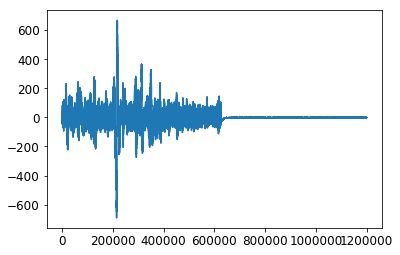

In [6]:
plt.plot(eeg_rawdata['sub1_1']['Time (EEG)'], eeg_rawdata['sub1_1']['Ch-8'])

## Adjusting timescales of auditory and meta awareness data
In the experiment the same time scale is used for EEG, auditory and meta awareness data. Time 0 ms denotes the start of each block, usually, there is a short delay until the first chunk of EEG data arrives.
Now the timescale is readjusted such that 0 ms corresponds to the arrival of the first octet of EEG data. The timestamps of auditory and meta awareness data are now relative to the onset of EEG recording, i. e. the time in ms that passed since the arrival of the first chunk of EEG data. Auditory stimuli that occured during the initial delay period are discarded for subsequent analysis.

In [7]:
auditory = {}
for sub in aud_files:
    # loading auditory data
    auditory[sub] = pd.read_csv(aud_files[sub], sep=',', index_col=False, skipfooter=2)
    # adjusting timescale
    auditory[sub].loc[:, 'Stimulus onset (audio)'] -= eeg_rawdata[sub].loc[0, 'Time (EEG)']
    # discarding events prior to EEG recording
    auditory[sub] = auditory[sub][auditory[sub]['Stimulus onset (audio)'] >= 0]

/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [8]:
mw = {}
for sub in mw_files:
    # loading meta awareness data (button presses)
    mw[sub] = pd.read_csv(mw_files[sub], sep=',', index_col=False, skipfooter=2)
    # adjusting timescale
    mw[sub].loc[:, 'Time (meta awareness)'] -= eeg_rawdata[sub].loc[0, 'Time (EEG)']

/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


## Rereferencing
TP<sub>9</sub> becomes the reference electrode for bipolar referencing. TP<sub>9</sub> is a substitute for M1 which was used as a reference electrode by Braboszcz et al.

In [9]:
eeg = {}
for sub in eeg_rawdata:
    rawdata = eeg_rawdata[sub]
    reref = pd.DataFrame()
    reref['Time (ms)'] = rawdata['Time (EEG)'] - rawdata.loc[0, 'Time (EEG)']  # adjusting timescale of EEG data
    reref['AFz'] = rawdata['Ch-1'] + rawdata['Ch-2'] + rawdata['Ch-3'] + rawdata['Ch-4'] + rawdata['Ch-5'] + rawdata['Ch-6'] + rawdata['Ch-7'] + rawdata['Ch-8']
    reref['Fz'] = rawdata['Ch-2'] + rawdata['Ch-3'] + rawdata['Ch-4'] + rawdata['Ch-5'] + rawdata['Ch-6'] + rawdata['Ch-7'] + rawdata['Ch-8']
    reref['FC3'] = rawdata['Ch-3'] + rawdata['Ch-4'] + rawdata['Ch-5'] + rawdata['Ch-6'] + rawdata['Ch-7'] + rawdata['Ch-8']
    reref['FC4'] = rawdata['Ch-4'] + rawdata['Ch-5'] + rawdata['Ch-6'] + rawdata['Ch-7'] + rawdata['Ch-8']
    reref['Cz'] = rawdata['Ch-5'] + rawdata['Ch-6'] + rawdata['Ch-7'] + rawdata['Ch-8']
    reref['Pz'] = rawdata['Ch-6'] + rawdata['Ch-7'] + rawdata['Ch-8']
    reref['O1'] = rawdata['Ch-7'] + rawdata['Ch-8']
    reref['O2'] = rawdata['Ch-8']
    eeg[sub] = reref

In [10]:
eeg['sub1_1'].tail()

Time (ms)         AFz          Fz         FC3         FC4  \
266461  1199934.0 -388.330081 -383.496096 -378.662112 -388.330081   
266462  1199936.0  -57.202151  -70.898440 -103.125002  -58.007814   
266463  1199938.0  236.865254  220.751973  187.719746  223.168966   
266464  1199950.0   45.922901   48.339893   53.979542   35.449269   
266465  1199953.0 -228.808614 -217.529317 -194.970723 -225.585957   

                 Cz         Pz         O1        O2  
266461  -417.333987 -15.307617 -17.724609 -2.416992  
266462 -1707.202114 -58.007814  -4.833984 -1.611328  
266463  -606.665034 -30.615234 -13.696289 -2.416992  
266464  1353.515669   9.667969 -26.586914 -2.416992  
266465   895.898443  -1.611327 -20.947265 -2.416992

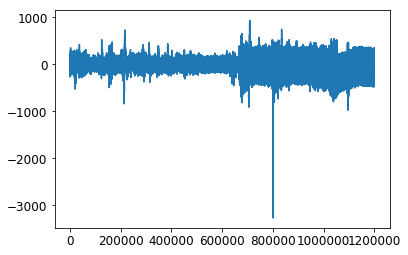

In [11]:
plt.plot(eeg['sub1_1']['Time (ms)'], eeg['sub1_1']['Fz'])

## Missing data
EEG recordings stopped after 1061488 ms in the first block of subject 7. Since the presentation of auditory stimuli continued for the rest of the block, auditory and meta awarenss data after 1061488 ms are discarded.

In [12]:
eeg['sub7_1'].tail()

Time (ms)           AFz            Fz           FC3           FC4  \
235776  1061465.0 -4.189453e+01 -4.592285e+01 -7.170410e+01 -3.867188e+01   
235777  1061468.0  1.611328e+00 -4.833985e+00 -3.303223e+01 -8.862305e+00   
235778  1061470.0  1.853027e+01  1.289062e+01 -2.336426e+01 -2.000000e-07   
235779  1061485.0 -1.530762e+01 -1.691895e+01 -5.478516e+01 -2.416992e+01   
235780  1061488.0  8.492280e+06  7.430765e+06  6.369239e+06  5.307710e+06   

                  Cz            Pz            O1            O2  
235776 -4.350586e+01 -1.933594e+01 -8.056641e+00 -2.336426e+01  
235777 -3.222656e+00  7.250977e+00  9.667969e+00 -1.208496e+01  
235778  4.833984e+00  1.450195e+01  1.208496e+01 -1.208496e+01  
235779 -2.658691e+01 -1.047363e+01 -8.862305e+00 -3.303223e+01  
235780  4.246178e+06  3.184644e+06  2.123101e+06  1.061554e+06

In [13]:
auditory['sub7_1'] = auditory['sub7_1'][auditory['sub7_1']['Stimulus onset (audio)'] < 1061488]
mw['sub7_1'] = mw['sub7_1'][mw['sub7_1']['Time (meta awareness)'] < 1061488]

## Creating MNE raw objects
In general, MNE does not support ```.csv``` as an input file format. However, it's possible to manually create MNE raw objects using numpy arrays (see [MNE documentation](https://mne.tools/stable/auto_examples/io/plot_objects_from_arrays.html#sphx-glr-auto-examples-io-plot-objects-from-arrays-py)).
Unfortunately, there is no way to handle the Traumschreiber's inconstant sampling rate within MNE. Time is not explcicitly represented, instead the timestamp of each EEG data vector is inferred from the total number of samples and the sampling rate. In consequence, MNE presupposes a constant sampling rate. This issue will be adressed in the epoching section (see below).

Creating RawArray with float64 data, n_channels=8, n_times=266466
    Range : 0 ... 266465 =      0.000 ...  1200.293 secs
Ready.


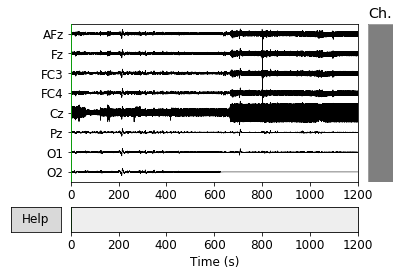

Creating RawArray with float64 data, n_channels=8, n_times=266294
    Range : 0 ... 266293 =      0.000 ...  1199.518 secs
Ready.


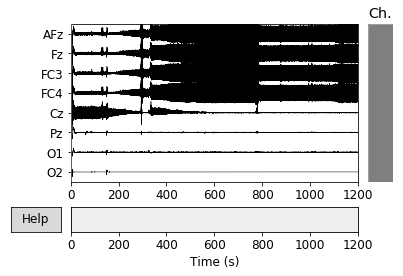

Creating RawArray with float64 data, n_channels=8, n_times=266564
    Range : 0 ... 266563 =      0.000 ...  1200.734 secs
Ready.


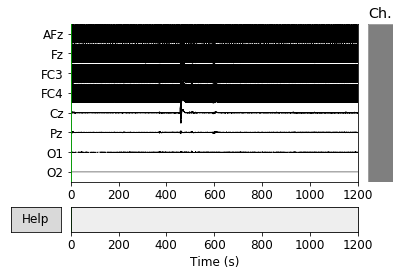

Creating RawArray with float64 data, n_channels=8, n_times=242153
    Range : 0 ... 242152 =      0.000 ...  1090.775 secs
Ready.


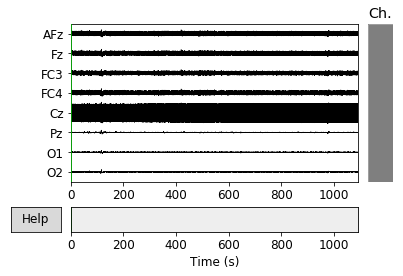

Creating RawArray with float64 data, n_channels=8, n_times=249588
    Range : 0 ... 249587 =      0.000 ...  1124.266 secs
Ready.


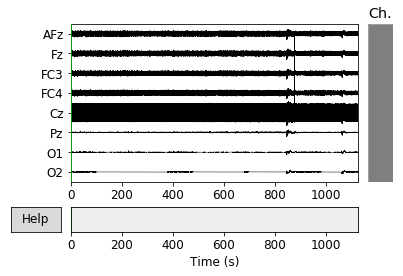

Creating RawArray with float64 data, n_channels=8, n_times=266351
    Range : 0 ... 266350 =      0.000 ...  1199.775 secs
Ready.


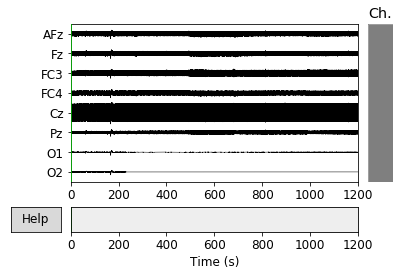

Creating RawArray with float64 data, n_channels=8, n_times=253136
    Range : 0 ... 253135 =      0.000 ...  1140.248 secs
Ready.


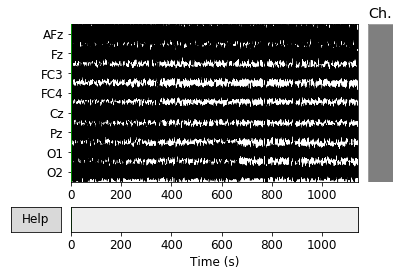

Creating RawArray with float64 data, n_channels=8, n_times=266560
    Range : 0 ... 266559 =      0.000 ...  1200.716 secs
Ready.


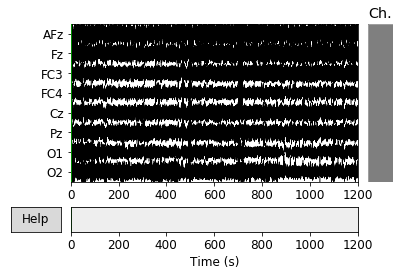

Creating RawArray with float64 data, n_channels=8, n_times=266659
    Range : 0 ... 266658 =      0.000 ...  1201.162 secs
Ready.


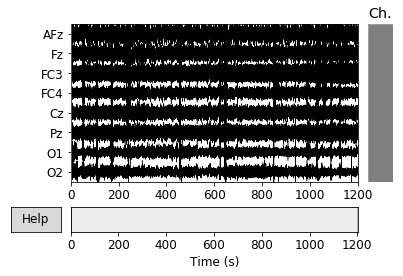

Creating RawArray with float64 data, n_channels=8, n_times=266127
    Range : 0 ... 266126 =      0.000 ...  1198.766 secs
Ready.


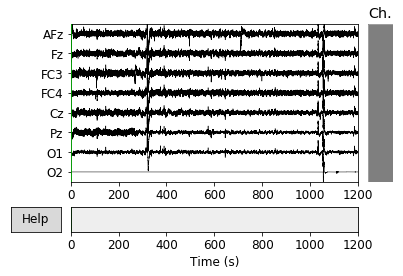

Creating RawArray with float64 data, n_channels=8, n_times=266526
    Range : 0 ... 266525 =      0.000 ...  1200.563 secs
Ready.


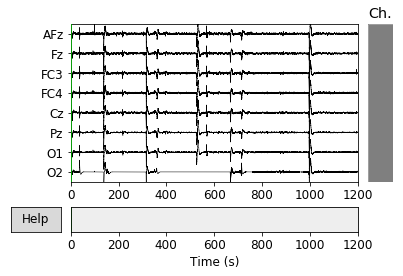

Creating RawArray with float64 data, n_channels=8, n_times=266479
    Range : 0 ... 266478 =      0.000 ...  1200.351 secs
Ready.


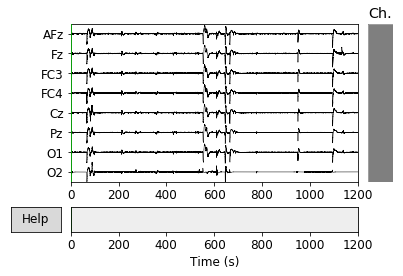

Creating RawArray with float64 data, n_channels=8, n_times=266598
    Range : 0 ... 266597 =      0.000 ...  1200.887 secs
Ready.


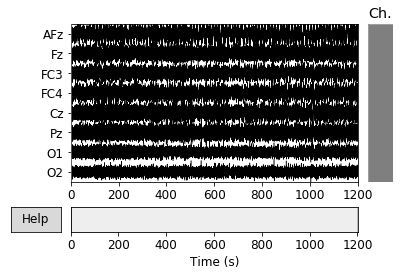

Creating RawArray with float64 data, n_channels=8, n_times=266513
    Range : 0 ... 266512 =      0.000 ...  1200.505 secs
Ready.


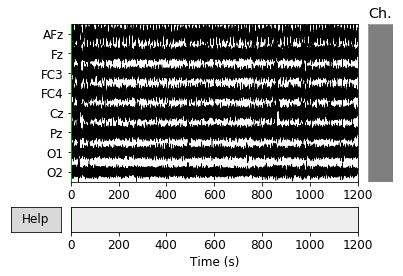

Creating RawArray with float64 data, n_channels=8, n_times=266545
    Range : 0 ... 266544 =      0.000 ...  1200.649 secs
Ready.


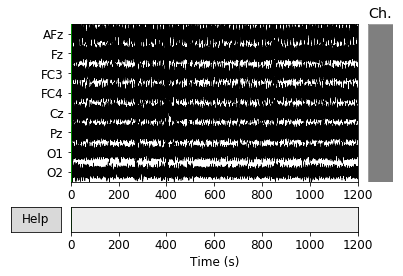

Creating RawArray with float64 data, n_channels=8, n_times=235781
    Range : 0 ... 235780 =      0.000 ...  1062.072 secs
Ready.


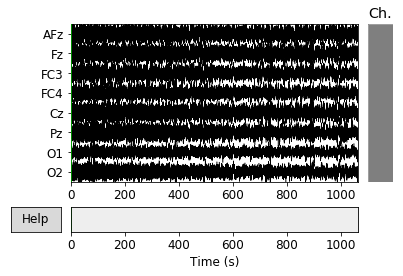

Creating RawArray with float64 data, n_channels=8, n_times=266533
    Range : 0 ... 266532 =      0.000 ...  1200.595 secs
Ready.


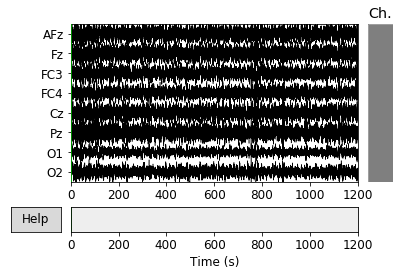

Creating RawArray with float64 data, n_channels=8, n_times=266452
    Range : 0 ... 266451 =      0.000 ...  1200.230 secs
Ready.


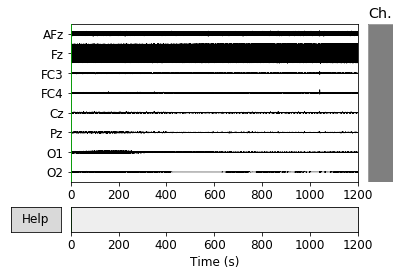

Creating RawArray with float64 data, n_channels=8, n_times=266542
    Range : 0 ... 266541 =      0.000 ...  1200.635 secs
Ready.


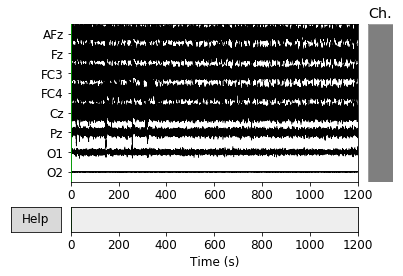

Creating RawArray with float64 data, n_channels=8, n_times=266505
    Range : 0 ... 266504 =      0.000 ...  1200.468 secs
Ready.


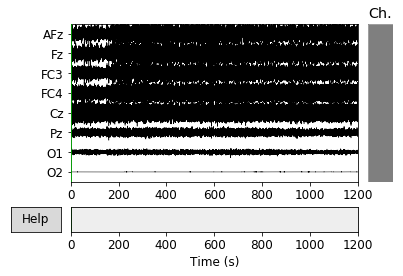

Creating RawArray with float64 data, n_channels=8, n_times=266591
    Range : 0 ... 266590 =      0.000 ...  1200.856 secs
Ready.


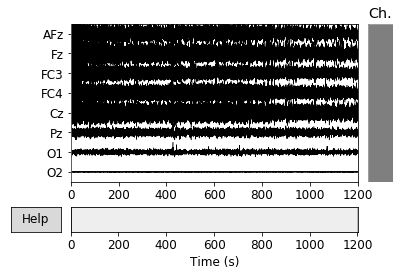

Creating RawArray with float64 data, n_channels=8, n_times=266532
    Range : 0 ... 266531 =      0.000 ...  1200.590 secs
Ready.


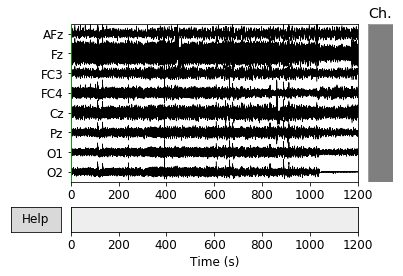

Creating RawArray with float64 data, n_channels=8, n_times=266528
    Range : 0 ... 266527 =      0.000 ...  1200.572 secs
Ready.


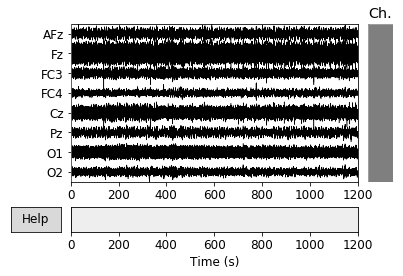

Creating RawArray with float64 data, n_channels=8, n_times=266185
    Range : 0 ... 266184 =      0.000 ...  1199.027 secs
Ready.


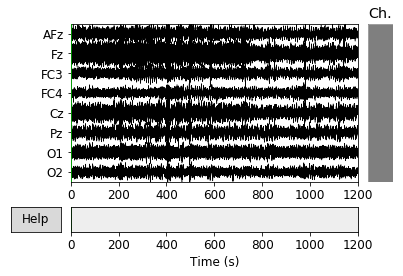

Creating RawArray with float64 data, n_channels=8, n_times=266526
    Range : 0 ... 266525 =      0.000 ...  1200.563 secs
Ready.


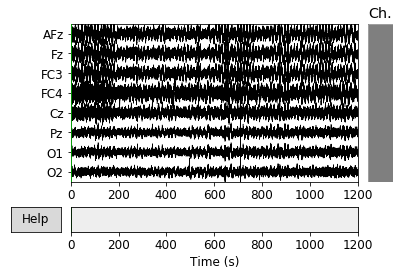

Creating RawArray with float64 data, n_channels=8, n_times=266689
    Range : 0 ... 266688 =      0.000 ...  1201.297 secs
Ready.


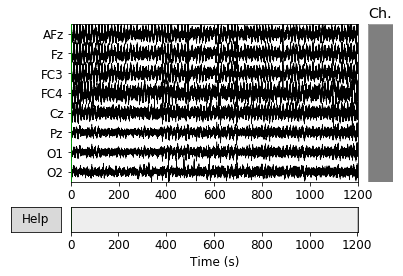

Creating RawArray with float64 data, n_channels=8, n_times=266660
    Range : 0 ... 266659 =      0.000 ...  1201.167 secs
Ready.


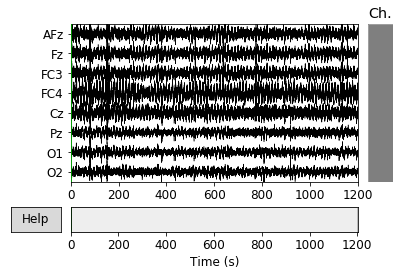

Creating RawArray with float64 data, n_channels=8, n_times=266465
    Range : 0 ... 266464 =      0.000 ...  1200.288 secs
Ready.


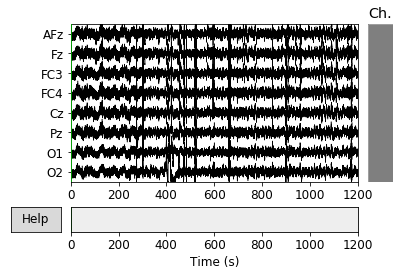

Creating RawArray with float64 data, n_channels=8, n_times=266574
    Range : 0 ... 266573 =      0.000 ...  1200.779 secs
Ready.


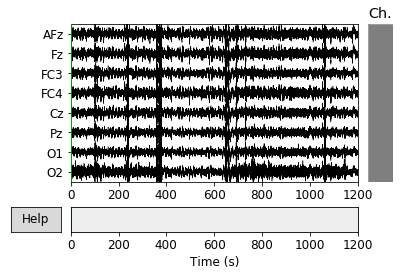

Creating RawArray with float64 data, n_channels=8, n_times=266560
    Range : 0 ... 266559 =      0.000 ...  1200.716 secs
Ready.


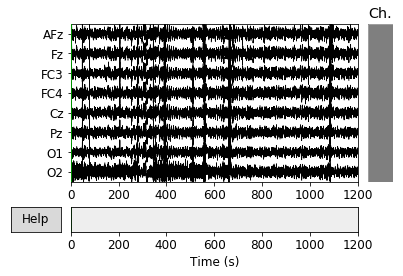

In [14]:
# Create info structure needed by MNE
ch_names = ['AFz', 'Fz', 'FC3', 'FC4', 'Cz', 'Pz', 'O1', 'O2' ]
ch_types = 'eeg'
sampling_freq = 222
montage = '/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/mne/channels/data/montages/standard_1020.elc'
info = mne.create_info(ch_names, sampling_freq, ch_types=ch_types, montage=montage)

raw = {} # dictionary containing rereferenced EEG data as MNE objects

for sub in eeg:
    data = eeg[sub].iloc[:,1:].to_numpy().T
    raw[sub] = mne.io.RawArray(data, info)
    fig = raw[sub].plot(n_channels=8, duration=1200, scalings='auto')
    fig.suptitle(str(sub)) 

Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective wind

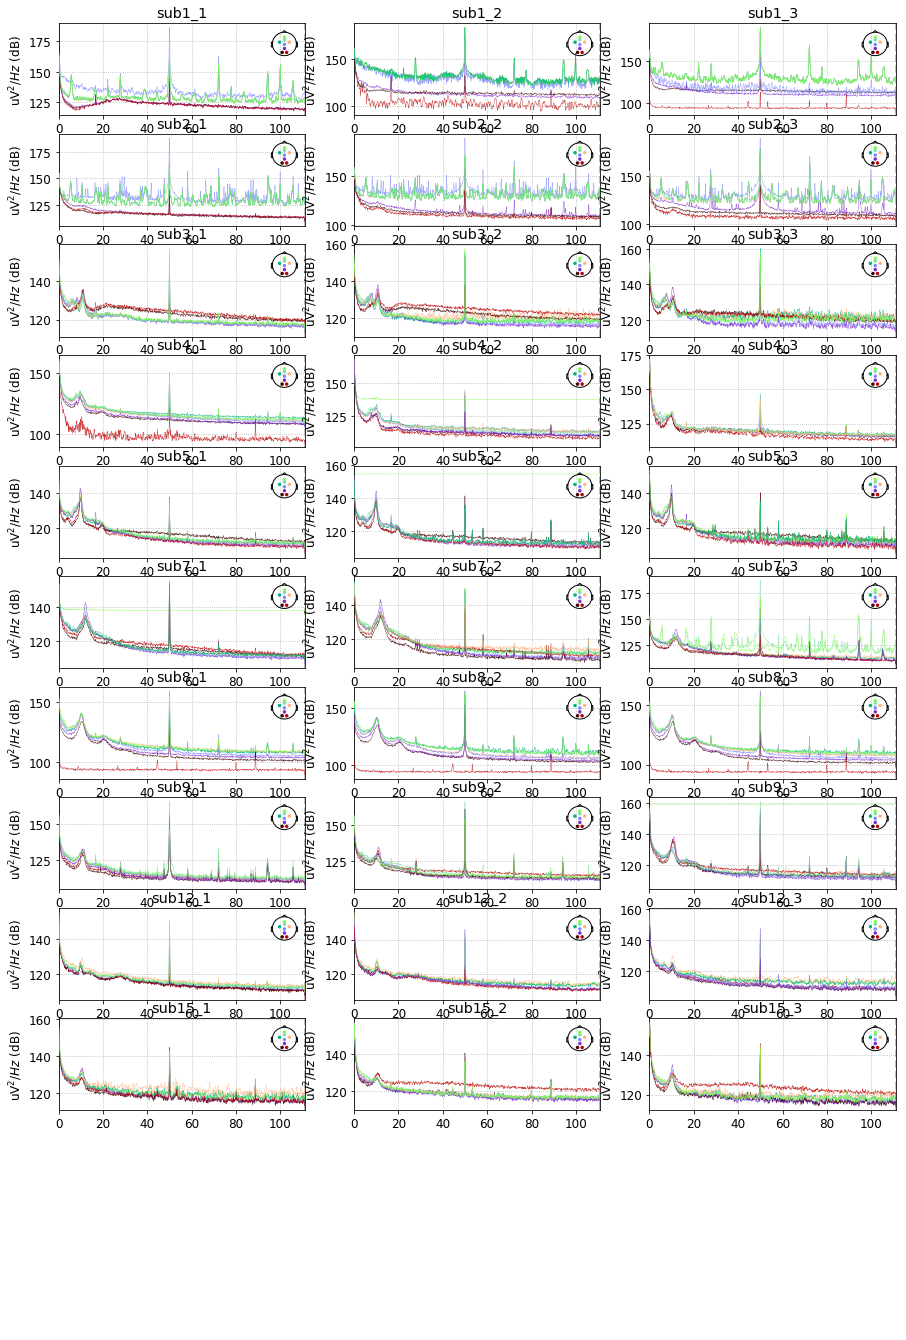

In [15]:
# Spectral Power density of raw EEG data for each block
fig, ax = plt.subplots(nrows=10, ncols=3, figsize=(15,20))
row = 0
col = 0

for sub in raw:
    raw[sub].plot_psd(ax=ax[row, col], show=False)
    ax[row,col].set(title=str(sub))
    if col == 2:
        col = 0
        row += 1
    else:
        col += 1
        
plt.show()
fig.savefig('./Figures/psd_raw.svg')

## Artificat detection: Independent Component Analysis (ICA)
Braboszcz et al. used Infomax ICA for artificat detection. The idea of ICA is to separate artifacts like eye blinks, lateral eye movement, heartbeat or other muscle noise from neural sources. Once independet components of the data have been identified some of those components can be marked as artifacts for removal in order to increasing the signal to noise rations (SNR).

As one can see below, it is not possbile to clearly identify which components of the Traumschreiber EEG data are artififacts. The data seem to be too noisy, almost all components look like artifacts. In this case, ICA does not help increasing the signal to noise ratio (SNR).

In [16]:
# copy raw data and apply high-pass filter at 1 Hz
raw_ica = {}
for sub in raw:
    raw_ica[sub] = raw[sub].copy()
    raw_ica[sub] = raw_ica[sub].load_data().filter(l_freq=1., h_freq=None)

Setting up high-pass filter at 1 Hz
l_trans_bandwidth chosen to be 1.0 Hz
Filter length of 733 samples (3.302 sec) selected
Setting up high-pass filter at 1 Hz
l_trans_bandwidth chosen to be 1.0 Hz
Filter length of 733 samples (3.302 sec) selected
Setting up high-pass filter at 1 Hz
l_trans_bandwidth chosen to be 1.0 Hz
Filter length of 733 samples (3.302 sec) selected
Setting up high-pass filter at 1 Hz
l_trans_bandwidth chosen to be 1.0 Hz
Filter length of 733 samples (3.302 sec) selected
Setting up high-pass filter at 1 Hz
l_trans_bandwidth chosen to be 1.0 Hz
Filter length of 733 samples (3.302 sec) selected
Setting up high-pass filter at 1 Hz
l_trans_bandwidth chosen to be 1.0 Hz
Filter length of 733 samples (3.302 sec) selected
Setting up high-pass filter at 1 Hz
l_trans_bandwidth chosen to be 1.0 Hz
Filter length of 733 samples (3.302 sec) selected
Setting up high-pass filter at 1 Hz
l_trans_bandwidth chosen to be 1.0 Hz
Filter length of 733 samples (3.302 sec) selected
Setting 

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 
Fitting ICA took 17.7s.


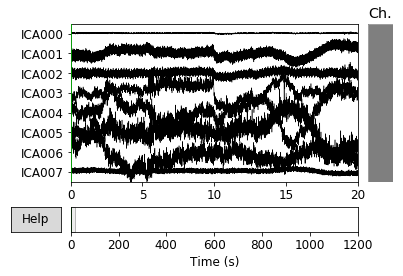

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 


/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/mne/preprocessing/infomax_.py:192: RuntimeWarning: overflow encountered in exp
  y = 1.0 / (1.0 + np.exp(-u))


Fitting ICA took 22.1s.


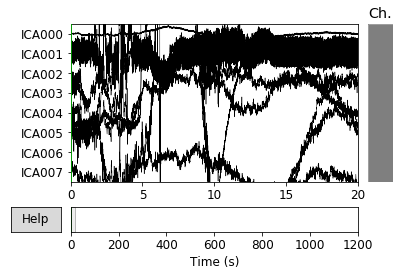

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 


/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/mne/preprocessing/infomax_.py:192: RuntimeWarning: overflow encountered in exp
  y = 1.0 / (1.0 + np.exp(-u))


Fitting ICA took 24.8s.


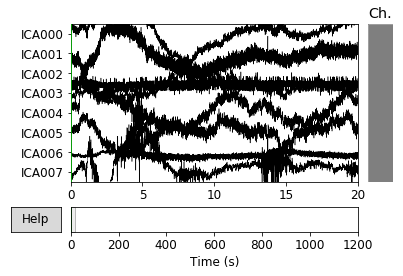

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 
Fitting ICA took 15.9s.


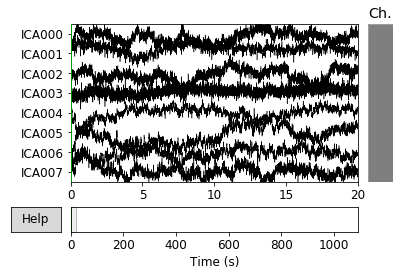

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 
Fitting ICA took 17.2s.


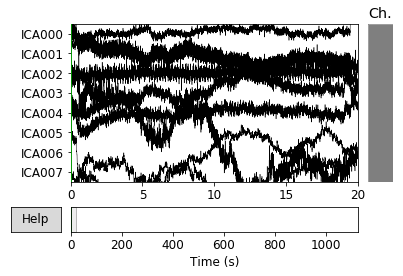

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 
Fitting ICA took 18.3s.


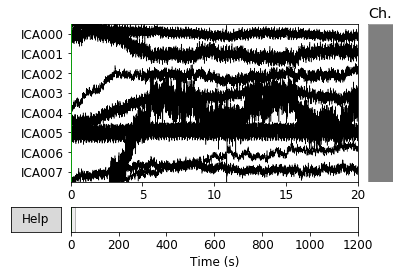

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 
Fitting ICA took 16.8s.


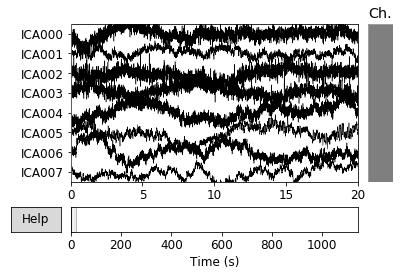

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 
Fitting ICA took 17.5s.


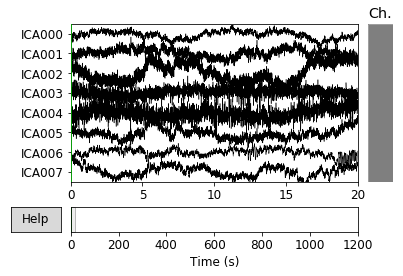

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 
Fitting ICA took 17.8s.


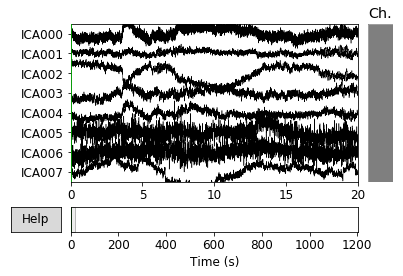

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 


/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/mne/preprocessing/infomax_.py:192: RuntimeWarning: overflow encountered in exp
  y = 1.0 / (1.0 + np.exp(-u))


Fitting ICA took 20.5s.


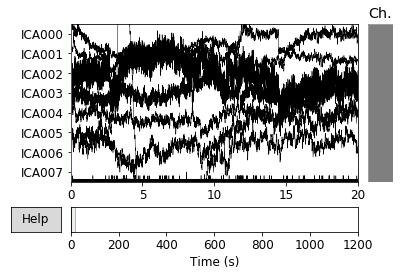

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 


/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/mne/preprocessing/infomax_.py:192: RuntimeWarning: overflow encountered in exp
  y = 1.0 / (1.0 + np.exp(-u))


Fitting ICA took 21.8s.


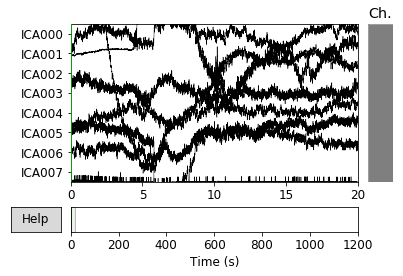

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 


/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/mne/preprocessing/infomax_.py:192: RuntimeWarning: overflow encountered in exp
  y = 1.0 / (1.0 + np.exp(-u))


Fitting ICA took 17.9s.


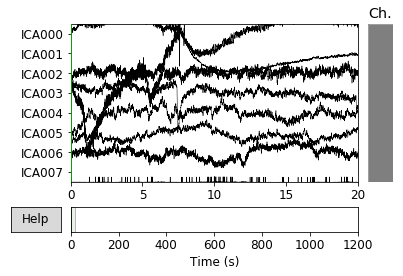

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 
Fitting ICA took 17.5s.


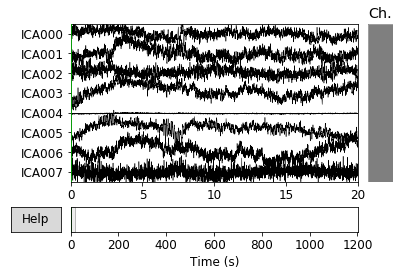

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 


/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/mne/preprocessing/infomax_.py:192: RuntimeWarning: overflow encountered in exp
  y = 1.0 / (1.0 + np.exp(-u))


Fitting ICA took 27.4s.


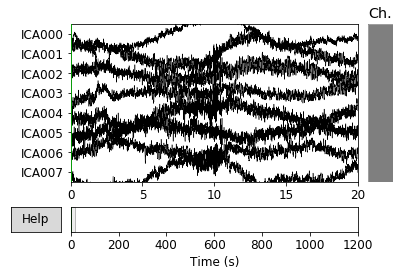

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 
Fitting ICA took 17.3s.


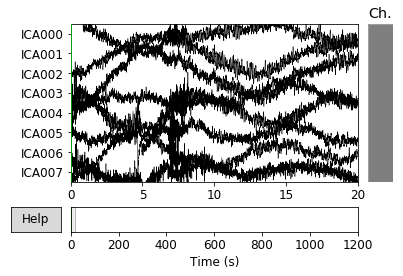

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 


/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/mne/preprocessing/infomax_.py:192: RuntimeWarning: overflow encountered in exp
  y = 1.0 / (1.0 + np.exp(-u))


Fitting ICA took 21.8s.


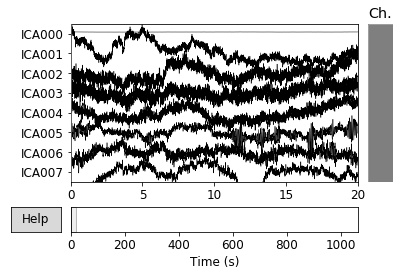

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 
Fitting ICA took 17.2s.


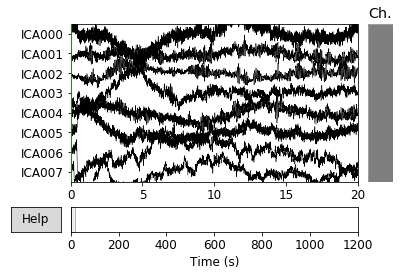

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 
Fitting ICA took 17.0s.


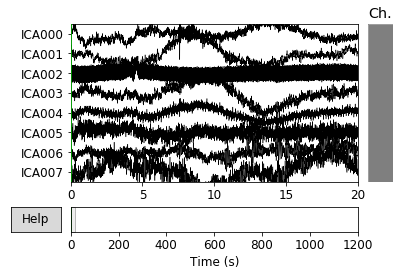

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 
Fitting ICA took 17.2s.


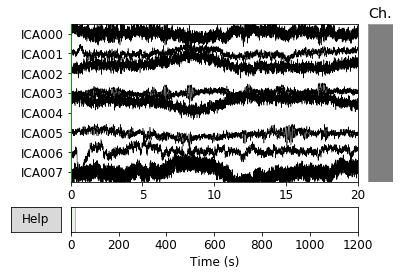

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 
Fitting ICA took 17.5s.


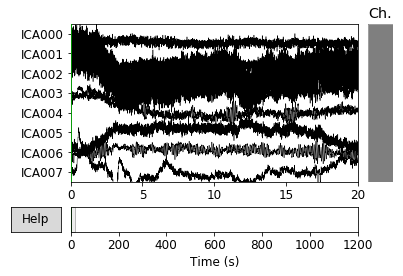

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 
Fitting ICA took 17.7s.


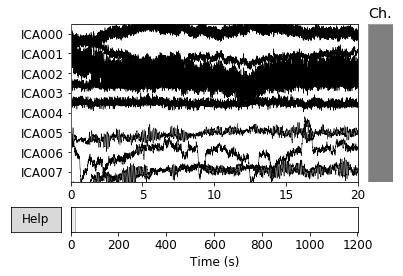

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 
Fitting ICA took 17.7s.


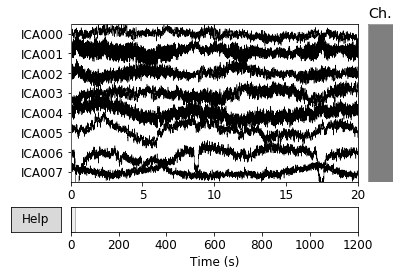

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 
Fitting ICA took 17.3s.


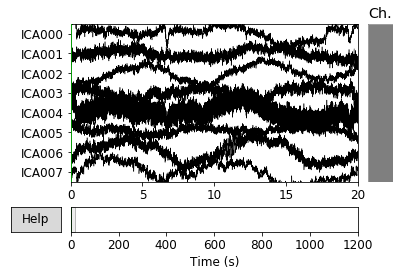

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 


/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/mne/preprocessing/infomax_.py:192: RuntimeWarning: overflow encountered in exp
  y = 1.0 / (1.0 + np.exp(-u))


Fitting ICA took 20.5s.


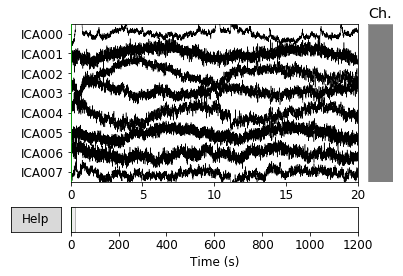

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 
Fitting ICA took 17.0s.


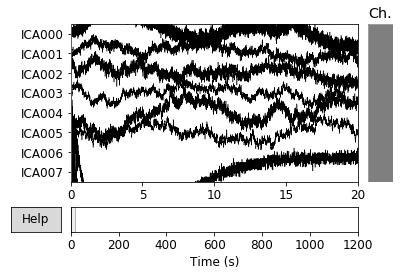

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 
Fitting ICA took 17.8s.


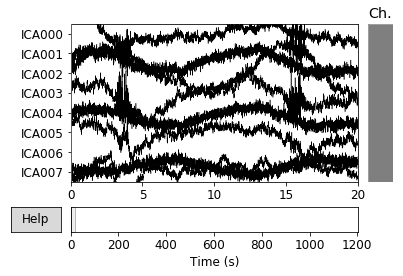

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 
Fitting ICA took 17.7s.


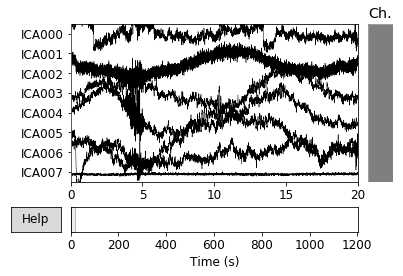

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 
Fitting ICA took 17.3s.


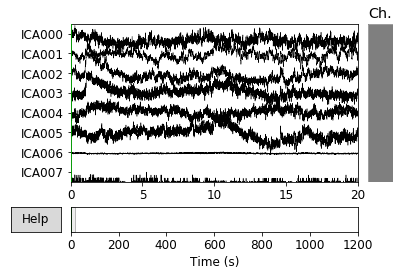

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 
Fitting ICA took 17.2s.


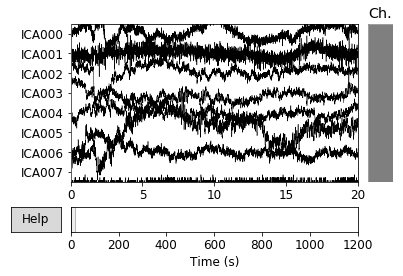

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 8
 
Fitting ICA took 17.5s.


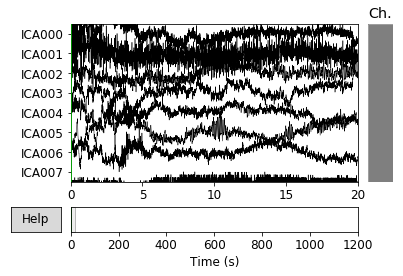

In [17]:
# fitting ICA
ica = {}
for sub in raw_ica:
    ica[sub] = mne.preprocessing.ICA(method='infomax', random_state=42)  # seed is set for replicability
    ica[sub] = ica[sub].fit(raw_ica[sub])
    ica[sub].plot_sources(raw[sub])  # visualizing independent components

## Filtering
Braboszcz et al. applied a non-linear elliptic high-pass filter and an non-linear elliptic notch filter between 45 Hz and 55 Hz. For visualizing the data Braboszcz et al. additionally used a 30 Hz linear low-pass filter, however, the data is not low-pass filtered for statistics. Due to the noisy data in the present case and the presence of very high frequencies in the data (see spectral power density) a band-pass filter from 1 to 30 Hz is used.

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


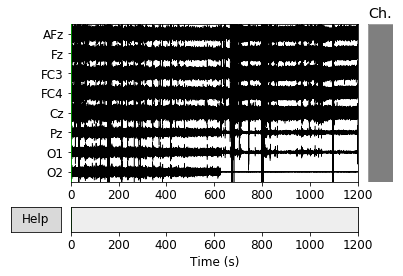

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


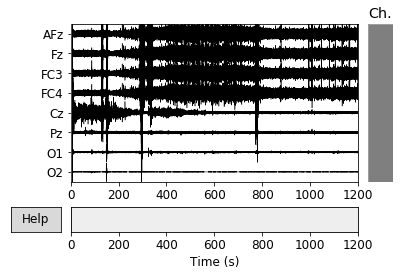

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


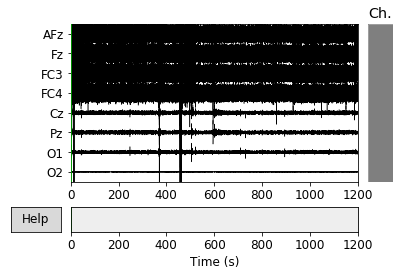

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


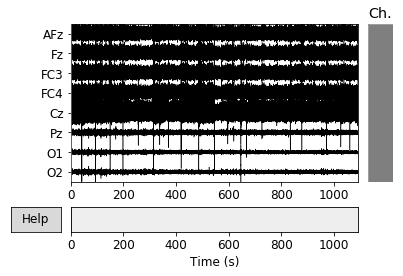

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


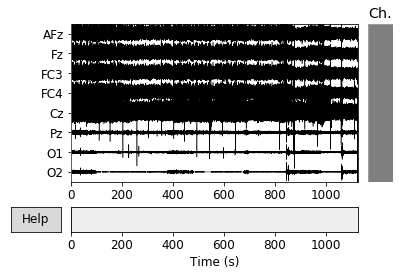

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


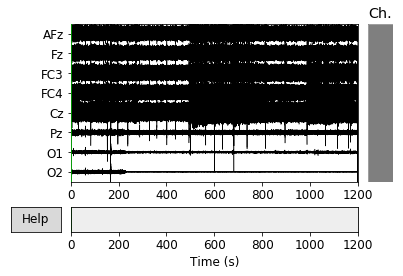

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


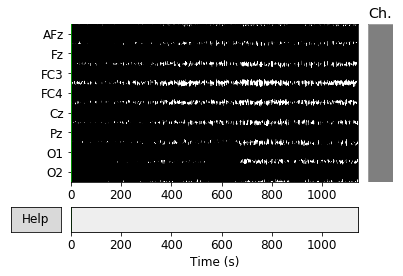

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


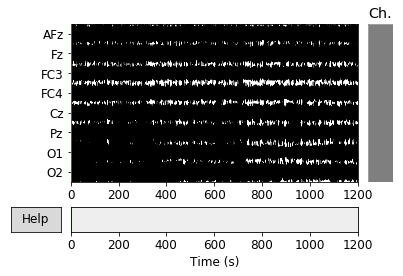

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


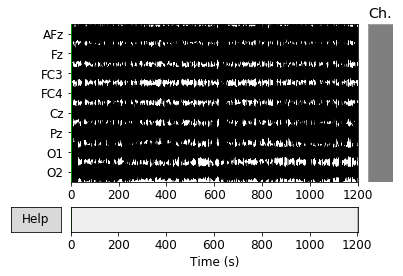

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


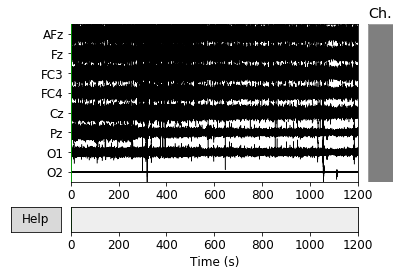

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


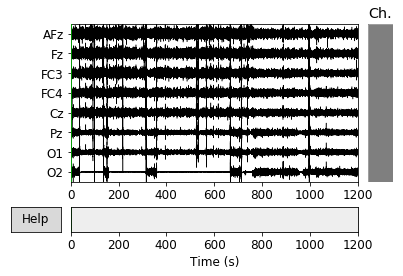

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


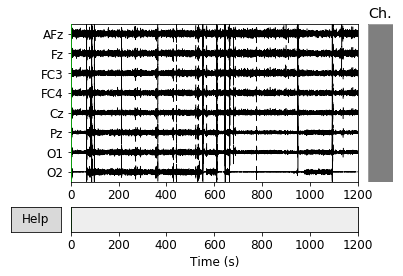

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


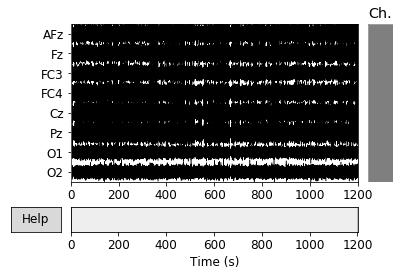

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


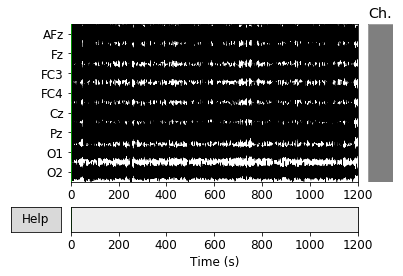

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


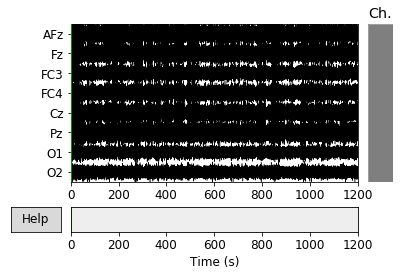

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


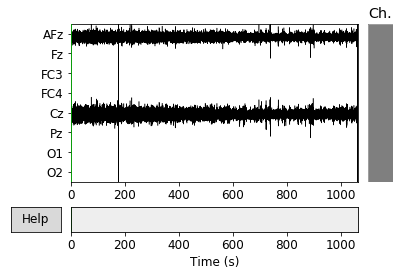

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


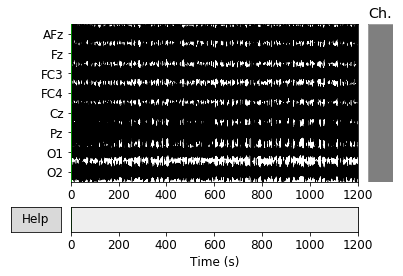

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


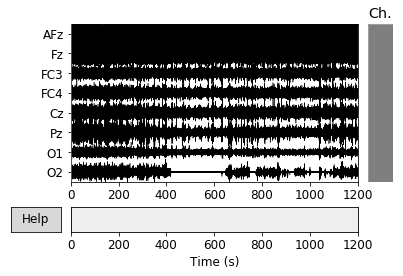

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


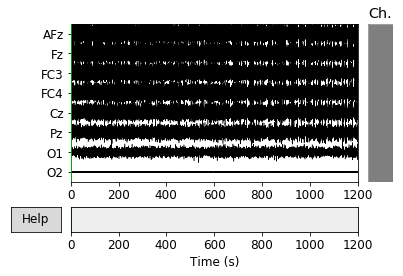

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


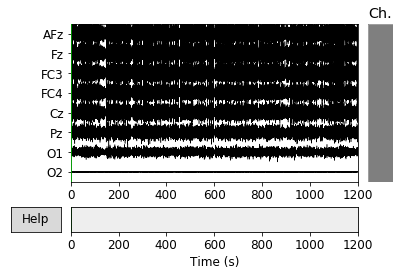

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


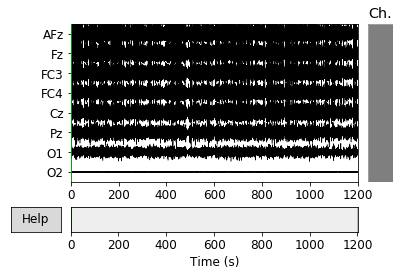

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


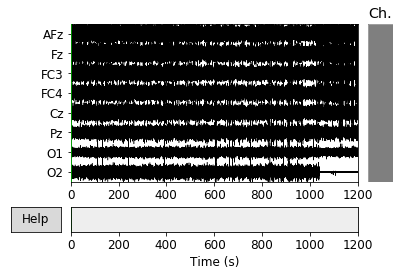

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


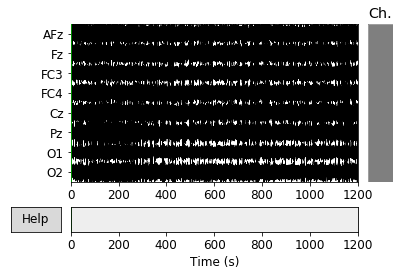

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


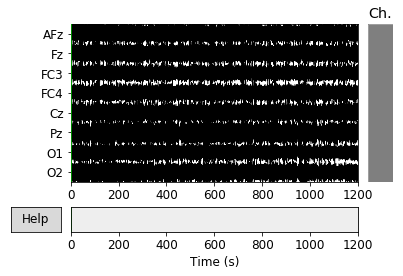

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


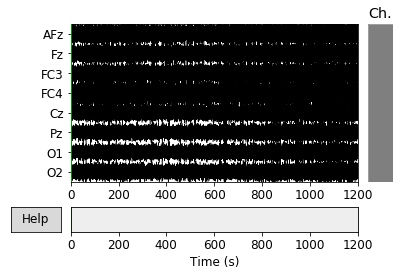

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


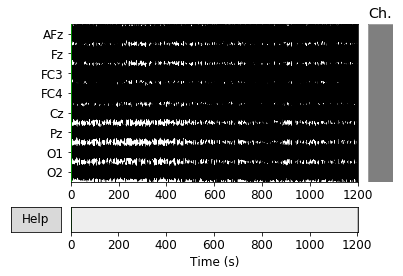

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


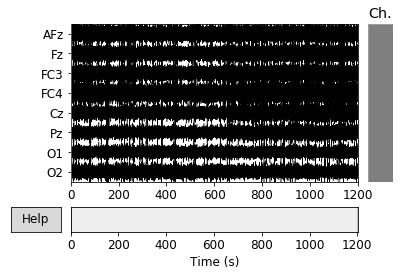

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


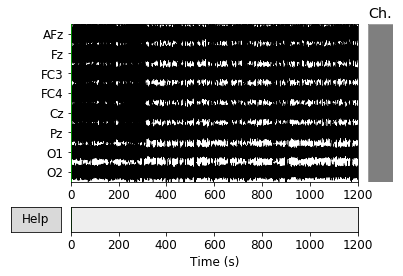

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


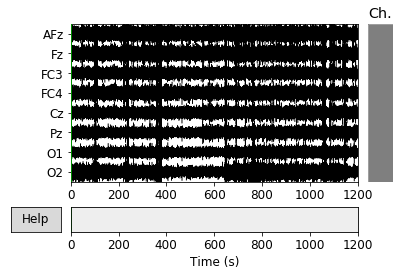

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 733 samples (3.302 sec) selected


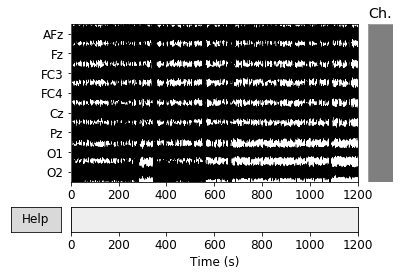

In [18]:
# band-pass filter from 1 - 30 Hz
for sub in raw:
    raw[sub] = raw[sub].load_data().filter(l_freq=1., h_freq=30.)
    raw[sub].plot(n_channels=8, duration=1200, scalings='auto')

Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective window size : 9.225 (s)
Effective wind

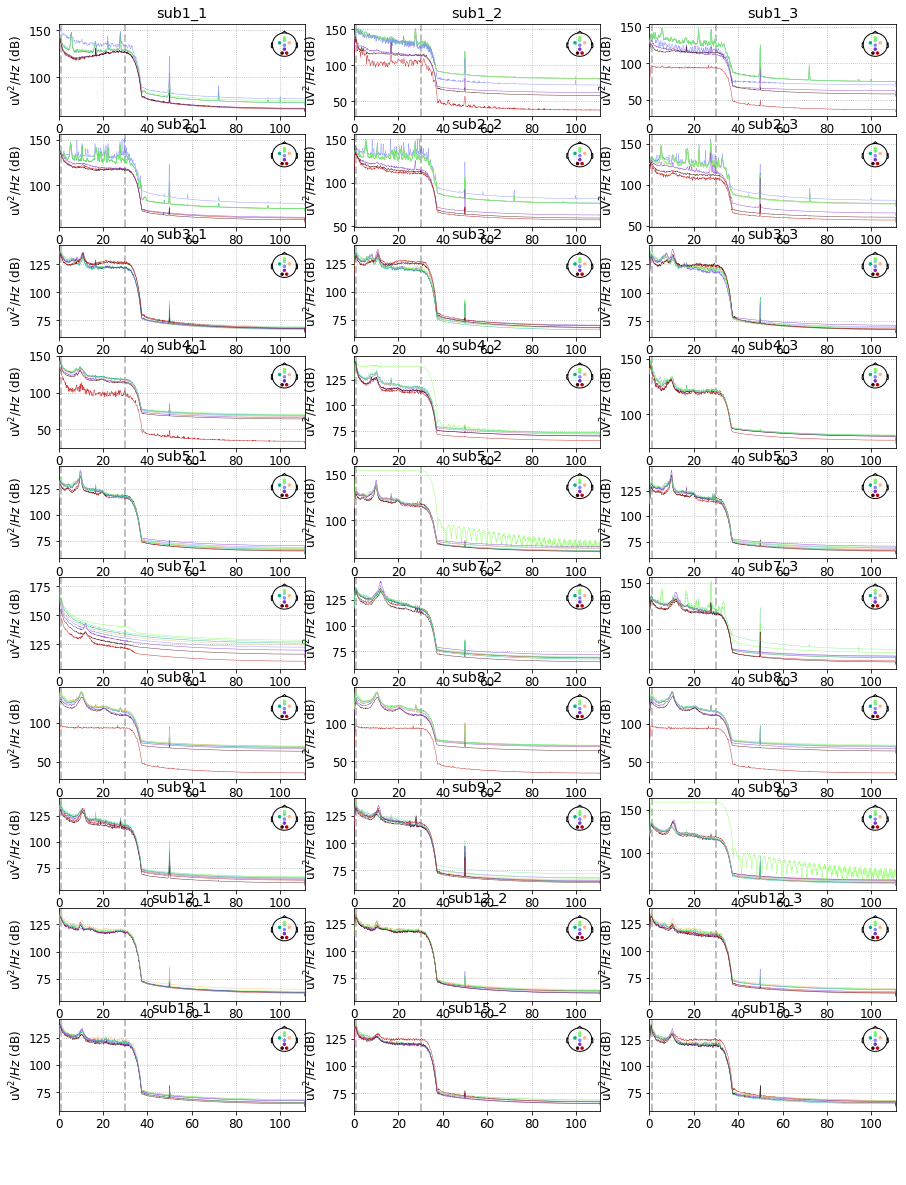

In [19]:
fig, ax = plt.subplots(nrows=10, ncols=3, figsize=(15,20))
row = 0
col = 0

for sub in raw:
    raw[sub].plot_psd(ax=ax[row, col], show=False)
    ax[row, col].set(title=str(sub))
    if col == 2:
        col = 0
        row += 1
    else:
        col += 1
plt.show()
fig.savefig('./Figures/psd_filtered.svg')

## Epoching - Event Related Potentials (ERPs)
MNE does not support two level epoching, i. e. computing epochs for mind wandering and breath focus on the first level and subepochs for standard and oddball stimuli on the former epochs. Therefore, the event codes have to be manipulated before epoching. 10 sec intervals prior and post button presses are extracted and within those 10 sec intervals, new event codes are assigned to standard and oddball auditory stimuli:
* 0 : standard auditory stimulus (more than 10 sec prior or post button press or -1 / +2 sec around button press)
* 1 : odbball auditory stimulus (more than 10 sec prior or post button press or -1 / +2 sec around button press)
* 2 : button press / meta awareness
* 3 : breath focus & oddball auditory stimulus
* 4 : breath focus & standard auditory stimulus
* 5 : mind wandering & oddball auditory stimulus
* 6 : mind wandering & standard auditory stimulus
* 7 : ambiguous --> conditions overlap, i. e. more than one meta awareness event occurs within 20 seconds

Again, since the present file format of Traumschreiber EEG data is not compatible with MNE's automatic event recognition functions, event files have to be created manually.

In [20]:
focused = {0:4, 1:3, 3:3, 4:4, 5:7, 6:7, 7:7}
wandering = {0:6, 1:5, 3:7, 4:7, 5:5, 6:6, 7:7}

for sub in auditory:
    mw[sub].loc[:, 'Stimulus type'] = 2
    df = auditory[sub]
    for idx, time in enumerate(mw[sub]['Time (meta awareness)']):
        mask_wandering = (df['Stimulus onset (audio)'] > time - 10000) & (df['Stimulus onset (audio)'] < time - 2000)
        mask_focused = (df['Stimulus onset (audio)'] > time + 1000) & (df['Stimulus onset (audio)'] < time + 10000)

        auditory[sub].loc[mask_wandering, 'Stimulus type'] = df[mask_wandering]['Stimulus type'].map(wandering)
        auditory[sub].loc[mask_focused, 'Stimulus type'] = df[mask_focused]['Stimulus type'].map(focused)
        
        # checking if the current meta awarenss intervall overlaps with its predecessor
        if len(auditory[sub].loc[mask_wandering, 'Stimulus type'][df.loc[mask_wandering,'Stimulus type'] == 7]) != 0:
            mw[sub].iloc[idx, 1] = 7  # mark current meta awareness event as ambiguous
            mw[sub].iloc[idx - 1, 1] = 7  # mark previous meta awareness event as ambiguos

MNE event files represent time in terms of sample numbers. The naive approach would be to calculate

$$\frac{EventOnsetTime(ms)} {1000} * SamplingFrequency(Hz)$$ 

in order to obtain the sample number for each event, given the onset time of each event. However, the sampling rate of the Traumschreiber is not constant at 222 Hz, thus, assuming a constant sampling rate of 222 Hz and following the formula above would yield inaccuracies in magnitude of up to 1 sec (inaccuracies increase over the course of each 20 min block).

As a workaround, one can infer the sample number from the index of the Pandas EEG data. Given an event onset time, one has to look for the octet of EEG data whose timestamp is closest to the respective event onset time. Once the right octet of EEG data is found, one can use its index and pass it as an event sample number to the MNE raw object. Note that the time which is associated to the very same octet of EEG data in the MNE raw object differs from the correct time stamp in the Pandas EEG data file, because the MNE raw object infers time from the total number of samples and the sampling rate, presupposing that the sampling rate is constant.

In [21]:
def find_sample(sub, event_onset):
    df = eeg[sub]
    # EEG data in a 200 ms interval centered on the event onset time
    mask = (df['Time (ms)'] > event_onset - 100) & (df['Time (ms)'] < event_onset + 100)
    indices = df[mask].index.values
    # Look for EEG octet closest to event onset
    idx = np.searchsorted(eeg[sub][mask]['Time (ms)'], event_onset, side='left')
    # return index aka sample number of EEG octet closest to event onset
    return indices[idx]

In [22]:
event_dict = {'MetaAwareness' : 2, 'Oddball/BreathFocus' : 3, 'Standard/BreathFocus' : 4,
              'Oddball/MindWandering' : 5, 'Standard/MindWandering' : 6}
events_mmn = {'Oddball/BreathFocus' : 3, 'Standard/BreathFocus' : 4, 'Oddball/MindWandering' : 5,
              'Standard/MindWandering' : 6}
events_tf = {'MetaAwareness' : 2}

rejection = dict(eeg=200)  # rejecting epochs > 200 μV

events = {}  # dictionary of events per subject
std_bf = {}  # dictionary of averaged 3s epochs standard / breath focus
odd_bf = {}  # dictionary of averaged 3s epochs oddball / breath focus
std_mw = {}  # dictionary of averaged 3s epochs standard / mind wandering
odd_mw = {}  # dictionary of averaged 3s epochs oddball / mind wandering
time_frequency = []  # list of 20s epochs for time-frequency analysis (not averaged!)

for sub in auditory:
    # concatenating onset times and event codes for auditory and meta awareness data
    onsets = auditory[sub]['Stimulus onset (audio)'].append(mw[sub]['Time (meta awareness)'])
    event_types = auditory[sub]['Stimulus type'].append(mw[sub]['Stimulus type'])
    # creating event array compatible with MNE
    events[sub] = np.array([[find_sample(sub, onset), 0, event_type] for onset, event_type in zip(onsets, event_types)], dtype=int)
    
    epochs_mmn = mne.Epochs(raw[sub], events[sub], event_id=events_mmn, tmin=-1., tmax=2., baseline=(-0.3, 0.), picks=[1], reject=rejection, preload=True, on_missing='ignore')
    epochs_mmn = epochs_mmn.crop(tmin=-0.1, tmax=0.45) # crop MMN epochs to [-100 ms, 450 ms]
    time_frequency.append(mne.Epochs(raw[sub], events[sub], event_id=events_tf, tmin=-10., tmax=10., baseline=None, picks=[6,7], reject=rejection, preload=True, on_missing='ignore'))
    
    std_bf[sub] = epochs_mmn['Standard/BreathFocus'].average()
    odd_bf[sub] = epochs_mmn['Oddball/BreathFocus'].average()
    std_mw[sub] = epochs_mmn['Standard/MindWandering'].average()
    odd_mw[sub] = epochs_mmn['Oddball/MindWandering'].average()
    
time_frequency = mne.concatenate_epochs(time_frequency, add_offset=False)  # concatenated epochs for TF analysis

17 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 17 events and 667 original time points ...
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
5 bad epochs dropped
1 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 1 events and 4441 original time points ...
0 bad epochs dropped
51 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 51 events and 667 original time points ...
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejec

/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
<ipython-input-22-9ecd16f24891>:27: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  std_bf[sub] = epochs_mmn['Standard/BreathFocus'].average()
<ipython-input-22-9ecd16f24891>:28: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  odd_bf[sub] = epochs_mmn['Oddball/BreathFocus'].average()
<ipython-input-22-9ecd16f24891>:30: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  odd_mw[sub] = epochs_mmn['Oddball/MindWandering'].average()


175 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 175 events and 667 original time points ...
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
10 bad epochs dropped
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 9 events and 4441 original time points ...
0 bad epochs dropped
324 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 324 events and 667 original time points ...
    

    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecti

Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 287 events and 667 original time points ...
0 bad epochs dropped
7 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 7 events and 4441 original time points ...
0 bad epochs dropped
297 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 297 events and 667 original time points ...
0 bad epochs dropped
12 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 12 events and 4441 original time points ...
    Rejecting  epoch based on EEG : ['O2']
1 bad epochs dropped
498 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 498 events and 667 original time points ...
    Rejecting  epoch based on 

    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
3 bad epochs dropped
2 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 2 events and 4441 original time points ...
    Rejecting  epoch based on EEG : ['O1', 'O2']
1 bad epochs dropped
267 matching events found
No baseline correction applied
Not setting metadata
0 bad epochs dropped


<ipython-input-22-9ecd16f24891>:32: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  time_frequency = mne.concatenate_epochs(time_frequency, add_offset=False)  # concatenated epochs for TF analysis


<ipython-input-23-e47d2ae119e6>:3: RuntimeWarning: event 0 missing from event_id will be ignored
  mne.viz.plot_events(events['sub5_3'], event_id=event_dict, sfreq=raw[sub].info['sfreq'], axes=ax_events, show=False)
<ipython-input-23-e47d2ae119e6>:3: RuntimeWarning: event 1 missing from event_id will be ignored
  mne.viz.plot_events(events['sub5_3'], event_id=event_dict, sfreq=raw[sub].info['sfreq'], axes=ax_events, show=False)
<ipython-input-23-e47d2ae119e6>:3: RuntimeWarning: event 7 missing from event_id will be ignored
  mne.viz.plot_events(events['sub5_3'], event_id=event_dict, sfreq=raw[sub].info['sfreq'], axes=ax_events, show=False)


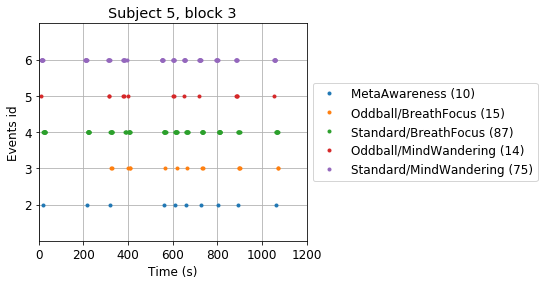

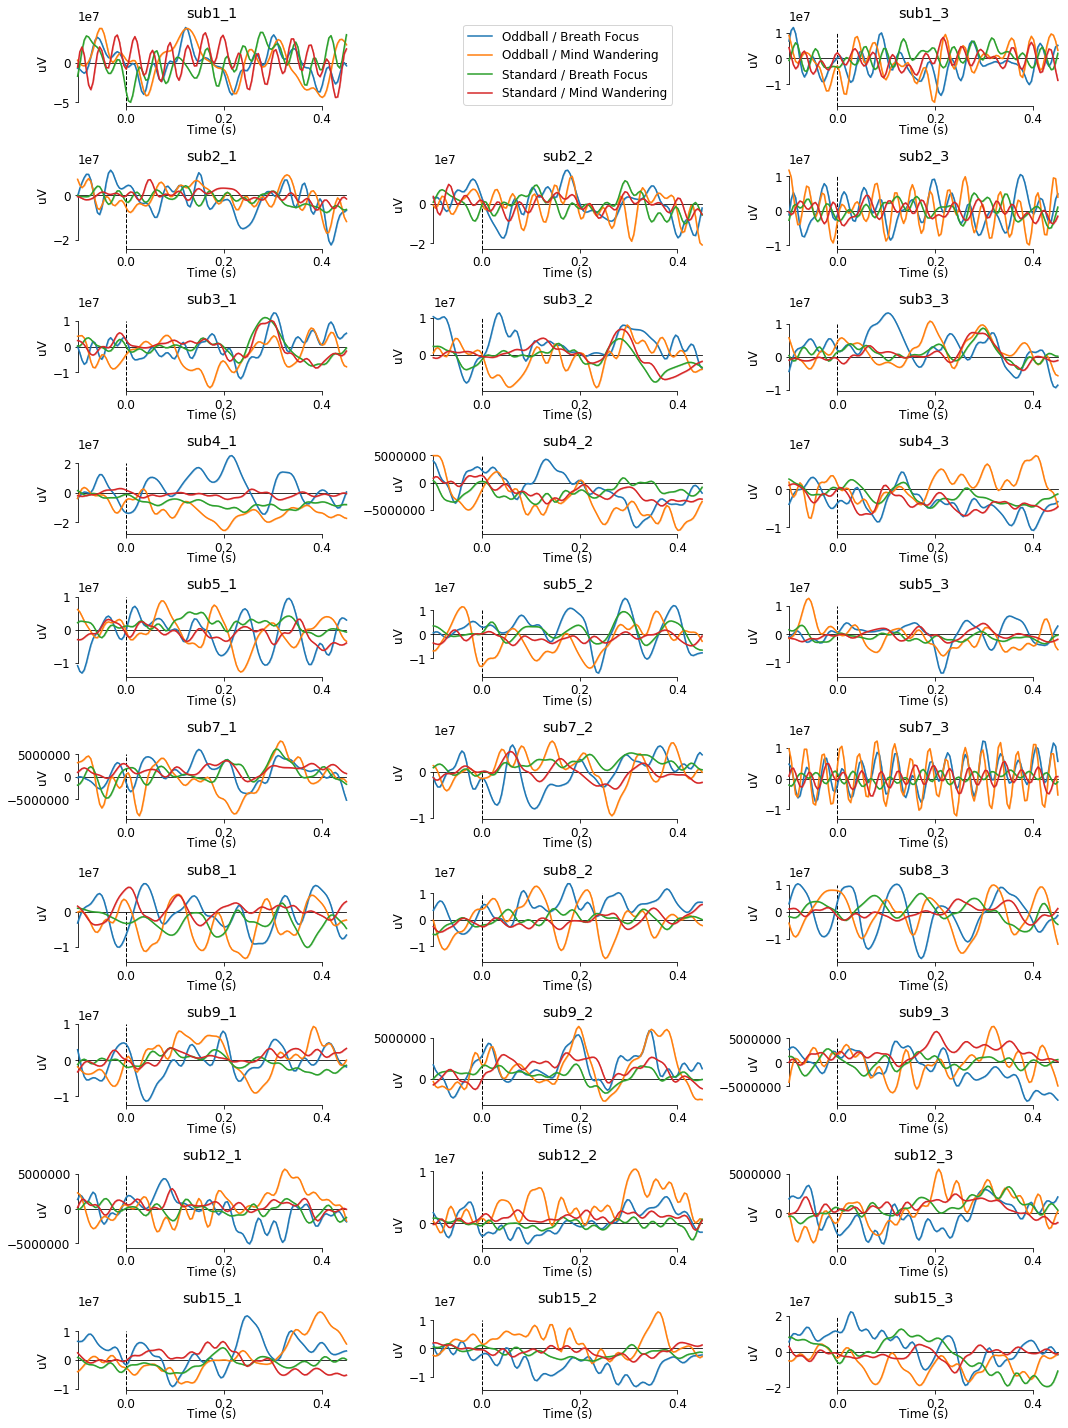

In [23]:
# visualizing example event distribution for subject 5, block 3
fig_events, ax_events = plt.subplots()
mne.viz.plot_events(events['sub5_3'], event_id=event_dict, sfreq=raw[sub].info['sfreq'], axes=ax_events, show=False)
ax_events.set(xlim=[0,1200], title='Subject 5, block 3')
plt.show()

# visualizing ERPs per subject and block
fig_erps, ax_erps = plt.subplots(nrows=10, ncols=3, figsize=(15,20))
row = 0
col = 0

for sub in raw:
    
    if std_bf[sub].nave > 0 and odd_bf[sub].nave > 0 and std_mw[sub].nave > 0 and odd_mw[sub].nave > 0:
        conditions = {'Standard / Breath Focus' : std_bf[sub], 'Oddball / Breath Focus' : odd_bf[sub],
                      'Standard / Mind Wandering' : std_mw[sub], 'Oddball / Mind Wandering' : odd_mw[sub]}
        mne.viz.plot_compare_evokeds(conditions, picks=[0], axes=ax_erps[row, col], show=False, show_legend=False, show_sensors=False)
    ax_erps[row, col].set(title=str(sub))
        
    if col == 2:
        col = 0
        row += 1
    else:
        col += 1

handles, labels = ax_erps[0,0].get_legend_handles_labels()
ax_erps[0,1].clear()
ax_erps[0,1].legend(handles, labels, loc='center')
ax_erps[0,1].set_axis_off()
        
fig_erps.tight_layout()
plt.show()  

fig_events.savefig('./Figures/events.svg')
fig_erps.savefig('./Figures/ERPs.svg')

Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.


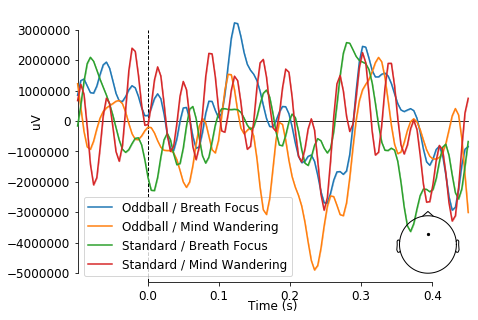

In [24]:
### Grand average of ERPs
std_bf_avg = []  
odd_bf_avg = [] 
std_mw_avg = []
odd_mw_avg = []

for sub in raw:
    if std_bf[sub].nave > 0:
        std_bf_avg.append(std_bf[sub])
    if odd_bf[sub].nave > 0:
        odd_bf_avg.append(odd_bf[sub])
    if std_mw[sub].nave > 0:
        std_mw_avg.append(std_mw[sub])
    if odd_mw[sub].nave > 0:
        odd_mw_avg.append(odd_mw[sub])
    
fig, ax = plt.subplots(figsize=(7,5))
conditions = {'Standard / Breath Focus' : mne.grand_average(std_bf_avg),
              'Oddball / Breath Focus' : mne.grand_average(odd_bf_avg),
              'Standard / Mind Wandering' : mne.grand_average(std_mw_avg),
              'Oddball / Mind Wandering' : mne.grand_average(odd_mw_avg)}
mne.viz.plot_compare_evokeds(conditions, picks=[0], ci=True, title='', show_legend=3, show_sensors=4, axes=ax) 
plt.show()
fig.savefig('./Figures/ERP_GrandAverage.svg')

## ERP analysis: Auditory Mismatch Negativity

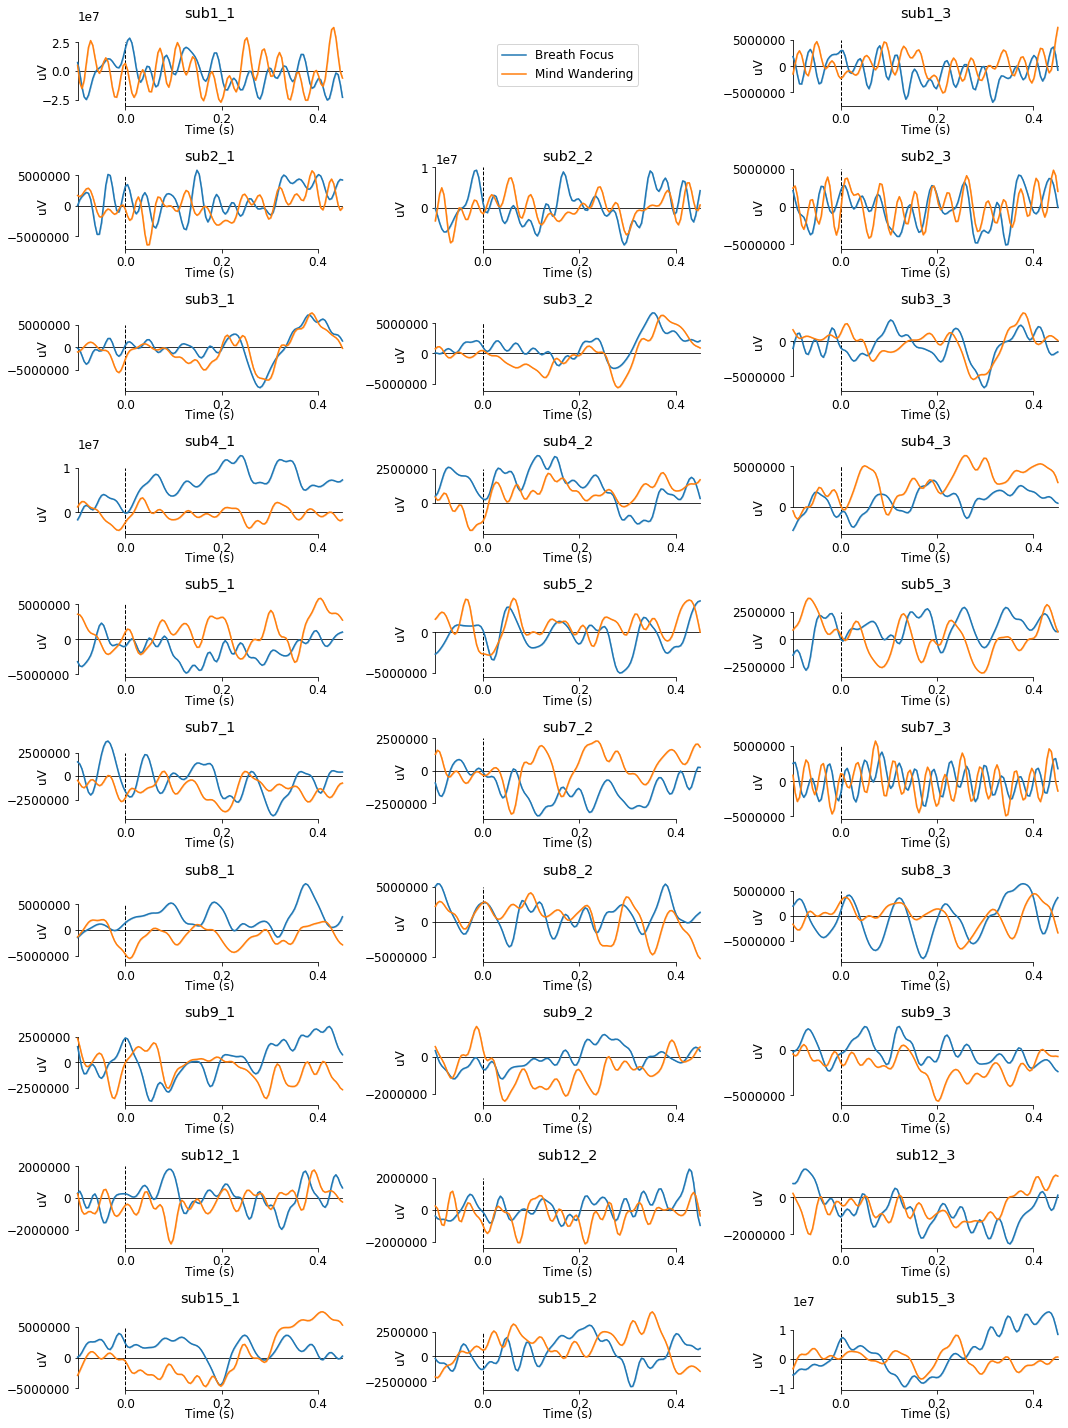

In [25]:
fig_mmn, ax_mmn = plt.subplots(nrows=10, ncols=3, figsize=(15,20))
row = 0
col = 0

# mismatch negativity (oddball - standard) for each block
for sub in eeg:
    if std_bf[sub].nave > 0 and odd_bf[sub].nave > 0 and std_mw[sub].nave > 0 and odd_mw[sub].nave > 0:
        conditions = {'Mind Wandering' : mne.combine_evoked([odd_mw[sub], -std_mw[sub]], weights='nave'),
                      'Breath Focus' : mne.combine_evoked([odd_bf[sub], -std_bf[sub]], weights='nave')}
        mne.viz.plot_compare_evokeds(conditions, picks=[0], ci=True, axes=ax_mmn[row, col], show=False, show_legend=False, show_sensors=False)
        
    ax_mmn[row, col].set(title=str(sub))
    if col == 2:
        col = 0
        row += 1
    else:
        col += 1
    
handles, labels = ax_mmn[0,0].get_legend_handles_labels()
ax_mmn[0,1].clear()
ax_mmn[0,1].legend(handles, labels, loc='center')
ax_mmn[0,1].set_axis_off()

fig_mmn.tight_layout()
plt.show()
fig_mmn.savefig('./Figures/MMN.svg')

Identifying common channels ...
all channels are corresponding, nothing to do.
Identifying common channels ...
all channels are corresponding, nothing to do.


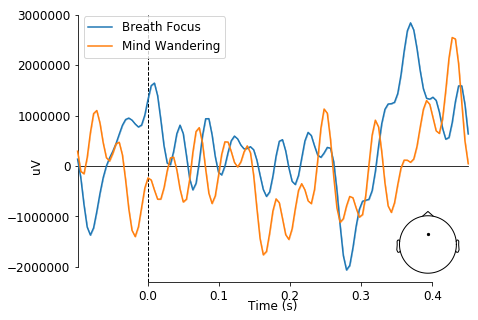

In [26]:
### Grand average of MMN
mmn_mw_avg = []
mmn_bf_avg = []

fig, ax = plt.subplots(figsize=(7,5))
for sub in raw:
    if odd_mw[sub].nave > 0 and std_mw[sub].nave > 0:
        mmn_mw_avg.append(mne.combine_evoked([odd_mw[sub], -std_mw[sub]], weights='nave'))
    if odd_bf[sub].nave > 0 and std_bf[sub].nave > 0:
        mmn_bf_avg.append(mne.combine_evoked([odd_bf[sub], -std_bf[sub]], weights='nave'))
        
conditions = {'Mind Wandering' : mne.grand_average(mmn_mw_avg),
              'Breath Focus' : mne.grand_average(mmn_bf_avg)}
mne.viz.plot_compare_evokeds(conditions, picks=[0], ci=True, show_sensors=4, show_legend=2, title='', axes=ax)
plt.show()
fig.savefig('./Figures/MMN_GrandAverage.svg')

## Time-frequency analysis
Braboszcz et al. applied Morlet wavelet decomposition to the 20 sec long epochs time-locked buttons presses aka meta awareness events. They used 200 linearly-spaced time points and a series of 100 log-spaced frequencies ranging from 1 Hz to 100 Hz, with 1.5 cycle at the lowest frequency increasing linearly and capping at eight cycles at 30 Hz.

Since we are only interested in changes in delta, theta, alpha and beta frequency bands we will only consider frequencies from 1 Hz to 30 Hz in the present analysis.

In [27]:
###  Morlet wavelet decomposition mind wandering vs. breath focus

frequencies = np.arange(1, 31, 1)  # linear spaced frequencies from 1 to 30 Hz
n_cycles = np.arange(1.5, 8.01, 13/58)  # linear cycle increase from 1.5 to 8 cycles

# time-frequency decomposition on averaged epochs for visualization
tfr_average = mne.time_frequency.tfr_morlet(time_frequency, frequencies, n_cycles, average=True, return_itc=False)

# time frequency decompostion on non-averaged epochs for statistics
# data are segmented according to frequency bands of interest and conditions (mind wandering vs. breath focus)

# delta 2 - 4 Hz
tfr_delta = mne.time_frequency.tfr_morlet(time_frequency, frequencies[1:3], n_cycles[1:3], average=False, return_itc=False)
tfr_epochs_mw_delta = tfr_delta.copy().crop(tmin=-10., tmax=0.)
tfr_epochs_bf_delta = tfr_delta.copy().crop(tmin=0., tmax=10.)

# theta 4 - 7 Hz
tfr_theta = mne.time_frequency.tfr_morlet(time_frequency, frequencies[3:7], n_cycles[3:7], average=False, return_itc=False)
tfr_epochs_mw_theta = tfr_theta.copy().crop(tmin=-10., tmax=0.)
tfr_epochs_bf_theta = tfr_theta.copy().crop(tmin=0., tmax=10.)

# alpha 9 - 11 Hz
tfr_alpha = mne.time_frequency.tfr_morlet(time_frequency, frequencies[8:11], n_cycles[8:11], average=False, return_itc=False)
tfr_epochs_mw_alpha = tfr_alpha.copy().crop(tmin=-10., tmax=0.)
tfr_epochs_bf_alpha = tfr_alpha.copy().crop(tmin=0., tmax=10.)

# beta 15 - 30 Hz
tfr_beta = mne.time_frequency.tfr_morlet(time_frequency, frequencies[14:], n_cycles[14:], average=False, return_itc=False)
tfr_epochs_mw_beta = tfr_beta.copy().crop(tmin=-10., tmax=0.)
tfr_epochs_bf_beta = tfr_beta.copy().crop(tmin=0., tmax=10.)

No baseline correction applied


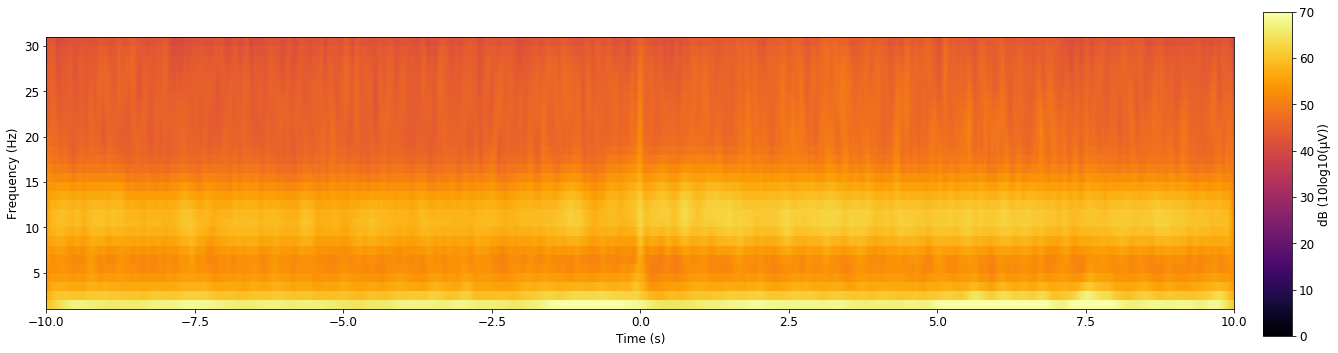

In [28]:
# averaged time-frequency decomposition of transition from mind wandering to breath focus
fig, ax = plt.subplots(figsize=(20,5))
tfr_average.plot(picks=[0,1], vmin=0., vmax=70., dB=True, combine='mean', cmap='inferno', title='', axes=ax, show=False, colorbar=False)

# adding custom colorbar
fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.97, 0.05, 0.02, 0.9])
colorbar = matplotlib.colorbar.ColorbarBase(cbar_ax, cmap='inferno',
                                norm=matplotlib.colors.Normalize(vmin=0., vmax=70.),
                                orientation='vertical')
colorbar.set_label('dB (10log10(μV))')
plt.show()
fig.savefig('./Figures/TimeFrequency.svg')

In [29]:
### Power difference mind wandering vs. breath focus for each frequency band (mean of channels O1 and O2)

# Note: Data of mind wandering episodes need to be flipped such that for each condition symmetric data points,
# with respect to time, are subtracted. For example, mind wandering data at -2 sec is substracted from breath focus
# data at +2 sec. Without flipping the data of one of the conditions, mind wandering data at -8 sec would be
# substracted from breath focus data at +2 sec.

# delta
power_mw_delta = (tfr_epochs_mw_delta.data[:, 0, :, :] + tfr_epochs_mw_delta.data[:, 1, :, :]) / 2 # mean O1 and O2
power_bf_delta = (tfr_epochs_bf_delta.data[:, 0, :, :] + tfr_epochs_bf_delta.data[:, 1, :, :]) / 2 # mean O1 and O2
power_diff_delta = power_bf_delta - np.flip(power_mw_delta, 2)  # power difference breath focus - mind wandering

# theta
power_mw_theta = (tfr_epochs_mw_theta.data[:, 0, :, :] + tfr_epochs_mw_theta.data[:, 1, :, :]) / 2 # mean O1 and O2
power_bf_theta = (tfr_epochs_bf_theta.data[:, 0, :, :] + tfr_epochs_bf_theta.data[:, 1, :, :]) / 2 # mean O1 and O2
power_diff_theta = power_bf_theta - np.flip(power_mw_theta, 2)  # power difference breath focus - mind wandering

# alpha
power_mw_alpha = (tfr_epochs_mw_alpha.data[:, 0, :, :] + tfr_epochs_mw_alpha.data[:, 1, :, :]) / 2 # mean O1 and O2
power_bf_alpha = (tfr_epochs_bf_alpha.data[:, 0, :, :] + tfr_epochs_bf_alpha.data[:, 1, :, :]) / 2 # mean O1 and O2
power_diff_alpha = power_bf_alpha - np.flip(power_mw_alpha, 2)  # power difference breath focus - mind wandering

# beta
power_mw_beta = (tfr_epochs_mw_beta.data[:, 0, :, :] + tfr_epochs_mw_beta.data[:, 1, :, :]) / 2 # mean O1 and O2
power_bf_beta = (tfr_epochs_bf_beta.data[:, 0, :, :] + tfr_epochs_bf_beta.data[:, 1, :, :]) / 2 # mean O1 and O2
power_diff_beta = power_bf_beta - np.flip(power_mw_beta, 2)  # power difference breath focus - mind wandering

In [30]:
power_diff_beta.shape

(267, 16, 2221)

In [31]:
### non-parametric cluster-level paired t-test for each frequency band (alpha = 0.05)

# delta
t_delta, clusters_delta, cluster_p_delta, H0_delta = \
    mne.stats.permutation_cluster_1samp_test(power_diff_delta, threshold=0.05, n_permutations=1000, tail=0, out_type='mask', buffer_size=None)

# theta
t_theta, clusters_theta, cluster_p_theta, H0_theta = \
    mne.stats.permutation_cluster_1samp_test(power_diff_theta, threshold=0.05, n_permutations=1000, tail=0, out_type='mask', buffer_size=None)
# alpha
t_alpha, clusters_alpha, cluster_p_alpha, H0_alpha = \
    mne.stats.permutation_cluster_1samp_test(power_diff_alpha, threshold=0.05, n_permutations=1000, tail=0, out_type='mask', buffer_size=None)
# beta
t_beta, clusters_beta, cluster_p_beta, H0_beta = \
    mne.stats.permutation_cluster_1samp_test(power_diff_beta, threshold=0.05, n_permutations=1000, tail=0, out_type='mask', buffer_size=None)


stat_fun(H1): min=nan max=nan
Running initial clustering
Found 19 clusters
Permuting 999 times...
[                                                            ]   1.30%  |   

/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/mne/stats/parametric.py:69: RuntimeWarning: invalid value encountered in true_divide
  return np.mean(X, axis=0) / np.sqrt(var / X.shape[0])
/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/mne/stats/cluster_level.py:352: RuntimeWarning: invalid value encountered in greater
  x_ins = [np.logical_and(x > thresh, include),
/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/mne/stats/cluster_level.py:353: RuntimeWarning: invalid value encountered in less
  np.logical_and(x < -thresh, include)]


[............................................................] 100.00%  |   
Computing cluster p-values
Done.
stat_fun(H1): min=nan max=nan
Running initial clustering
Found 41 clusters
Permuting 999 times...
[............................................................] 100.00%  |   
Computing cluster p-values
Done.
stat_fun(H1): min=nan max=nan
Running initial clustering
Found 11 clusters
Permuting 999 times...
[............................................................] 100.00%  |   
Computing cluster p-values
Done.
stat_fun(H1): min=nan max=nan
Running initial clustering
Found 45 clusters
Permuting 999 times...
[............................................................] 100.00%  |   
Computing cluster p-values
Done.


In [32]:
cluster_p_delta

array([0.969, 1.   , 0.35 , 1.   , 1.   , 1.   , 1.   , 0.114, 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   ])

In [33]:
cluster_p_theta

array([1.   , 0.939, 1.   , 0.962, 0.997, 0.956, 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       0.698, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   ])

In [34]:
cluster_p_alpha

array([0.38 , 0.001, 0.106, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   ])

In [35]:
cluster_p_beta

array([0.001, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ])

/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


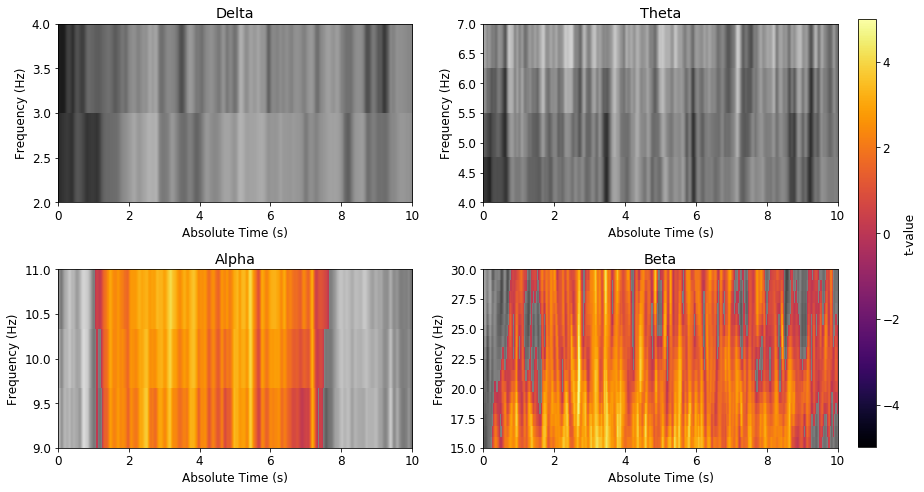

In [36]:
### Highlighting significant clusters (p < 0.05) for each frequency band

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,7))
vmax = np.max([np.nanmax(np.abs(t_delta)), np.nanmax(np.abs(t_theta)), np.nanmax(np.abs(t_alpha)), np.nanmax(np.abs(t_beta))])
vmin = -vmax

# delta
t_plot_delta = np.nan * np.ones_like(t_delta)
for c, p in zip(clusters_delta, cluster_p_delta):
    if p < 0.05:
        t_plot_delta[c] = t_delta[c]
ax[0, 0].imshow(t_delta, cmap=plt.cm.gray, extent=[0, 10, 2, 4], aspect='auto', origin='lower', vmin=vmin, vmax=vmax)
ax[0, 0].imshow(t_plot_delta, cmap=plt.cm.inferno, extent=[0, 10, 2, 4], aspect='auto', origin='lower', vmin=vmin, vmax=vmax)
ax[0, 0].set(xlabel='Absolute Time (s)', ylabel='Frequency (Hz)', title='Delta')

# theta
t_plot_theta = np.nan * np.ones_like(t_theta)
for c, p in zip(clusters_theta, cluster_p_theta):
    if p < 0.05:
        t_plot_theta[c] = t_theta[c]
ax[0, 1].imshow(t_theta, cmap=plt.cm.gray, extent=[0, 10, 4, 7], aspect='auto', origin='lower', vmin=vmin, vmax=vmax)
ax[0, 1].imshow(t_plot_theta, cmap=plt.cm.inferno, extent=[0, 10, 4, 7], aspect='auto', origin='lower', vmin=vmin, vmax=vmax)
ax[0, 1].set(xlabel='Absolute Time (s)', ylabel='Frequency (Hz)', title='Theta')

# alpha
t_plot_alpha = np.nan * np.ones_like(t_alpha)
for c, p in zip(clusters_alpha, cluster_p_alpha):
    if p < 0.05:
        t_plot_alpha[c] = t_alpha[c]
ax[1, 0].imshow(t_alpha, cmap=plt.cm.gray, extent=[0, 10, 9, 11], aspect='auto', origin='lower', vmin=vmin, vmax=vmax)
ax[1, 0].imshow(t_plot_alpha, cmap=plt.cm.inferno, extent=[0, 10, 9, 11], aspect='auto', origin='lower', vmin=vmin, vmax=vmax)
ax[1, 0].set(xlabel='Absolute Time (s)', ylabel='Frequency (Hz)', title='Alpha')

# beta
t_plot_beta = np.nan * np.ones_like(t_beta)
for c, p in zip(clusters_beta, cluster_p_beta):
    if p < 0.05:
        t_plot_beta[c] = t_beta[c]
ax[1, 1].imshow(t_beta, cmap=plt.cm.gray, extent=[0, 10, 15, 30], aspect='auto', origin='lower', vmin=vmin, vmax=vmax)
ax[1, 1].imshow(t_plot_beta, cmap=plt.cm.inferno, extent=[0, 10, 15, 30], aspect='auto', origin='lower', vmin=vmin, vmax=vmax)
ax[1, 1].set(xlabel='Absolute Time (s)', ylabel='Frequency (Hz)', title='Beta')

# colorbar
fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([1., 0.1, 0.02, 0.85])
colorbar = matplotlib.colorbar.ColorbarBase(cbar_ax, cmap='inferno',
                                            norm=matplotlib.colors.Normalize(vmin=vmin, vmax=vmax),
                                            orientation='vertical')
colorbar.set_label('t-value')
fig.tight_layout()
plt.show()
fig.savefig('./Figures/PowerDiff.svg')

No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied


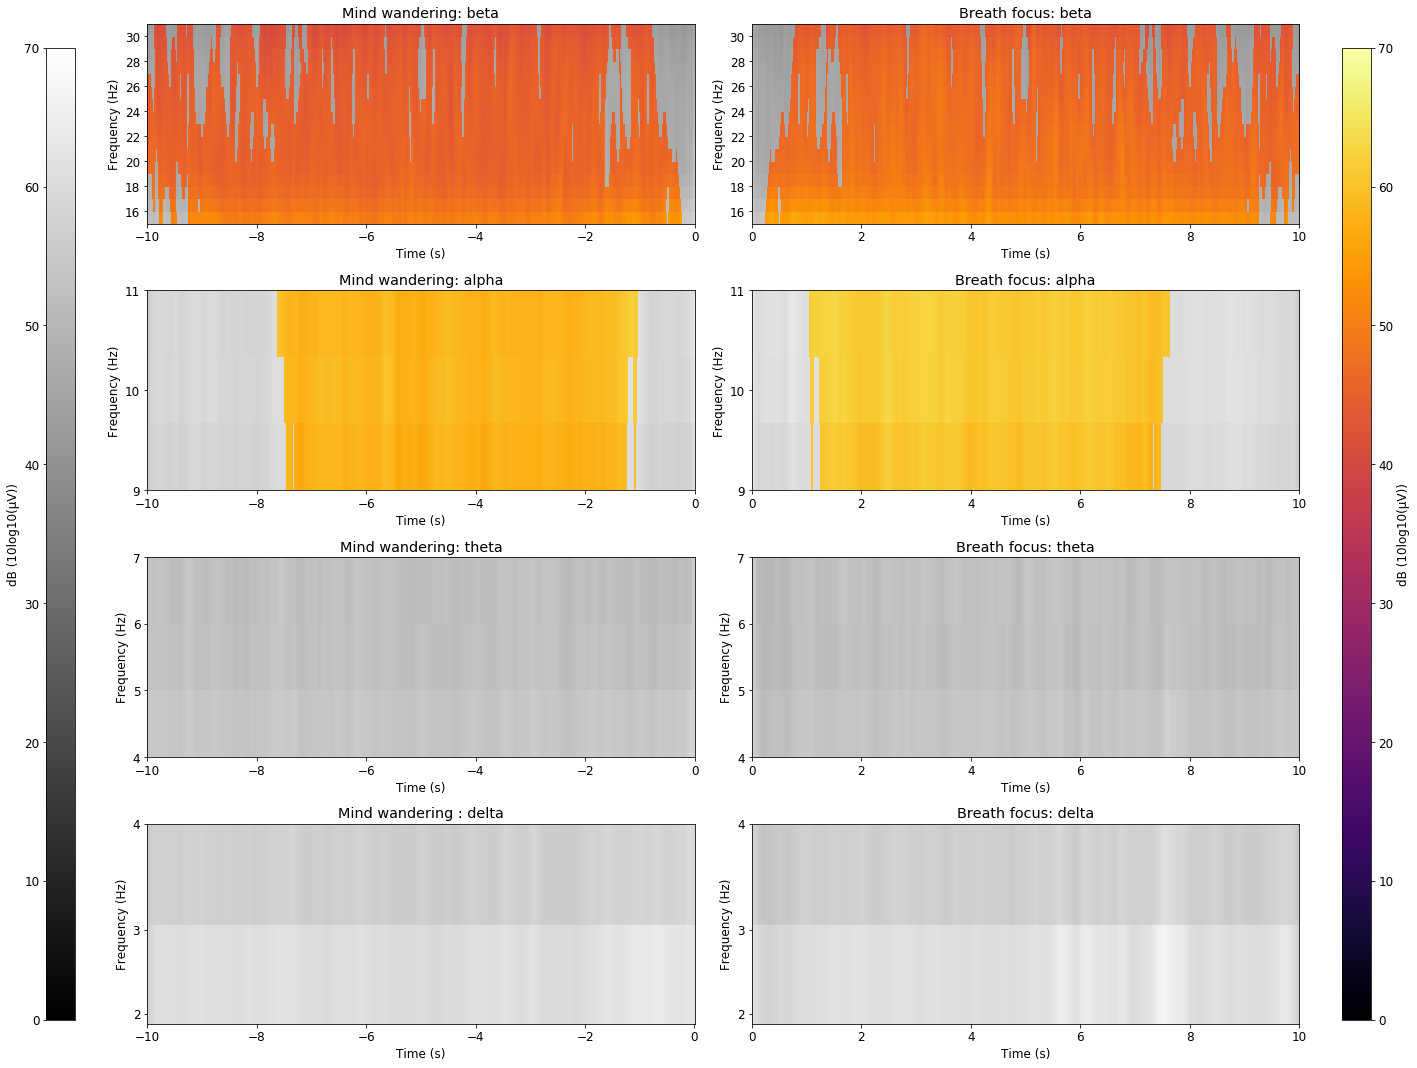

In [51]:
### Contrasting Time-frequency decomposition mind wandering vs. breath focus for each frequency band
### non-significant regions (p >= 0.05 are grayed-out)

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20,15))

tfr_average.plot(picks=[0,1], dB=True, combine='mean', tmin=-10., tmax=0., fmin=2., fmax=3.5, vmin=0., vmax=70.,
                 cmap='inferno', axes=ax[3,0], show=False, colorbar=False, mask=np.full((2,2221), False),
                 mask_style='mask', mask_cmap='gray', mask_alpha=1.)
tfr_average.plot(picks=[0,1], dB=True, combine='mean', tmin=-10., tmax=0., fmin=4., fmax=6., vmin=0., vmax=70.,
                 cmap='inferno', axes=ax[2,0], show=False, colorbar=False, mask=np.full((3,2221), False),
                 mask_style='mask', mask_cmap='gray', mask_alpha=1.)
tfr_average.plot(picks=[0,1], dB=True, combine='mean', tmin=-10., tmax=0., fmin=9., fmax=11., vmin=0., vmax=70.,
                 cmap='inferno', axes=ax[1,0], show=False, colorbar=False, mask=np.flip(clusters_alpha[1], 1),
                 mask_style='mask', mask_cmap='gray', mask_alpha=1.)
tfr_average.plot(picks=[0,1], dB=True, combine='mean', tmin=-10., tmax=0., fmin=15., fmax=30., vmin=0., vmax=70.,
                 cmap='inferno', axes=ax[0,0], show=False, colorbar=False, mask=np.flip(clusters_beta[0], 1),
                 mask_style='mask', mask_cmap='gray', mask_alpha=1.)
tfr_average.plot(picks=[0,1], dB=True, combine='mean', tmin=0., tmax=10., fmin=2., fmax=3.5, vmin=0., vmax=70.,
                 cmap='inferno', axes=ax[3,1], show=False, colorbar=False, mask=np.full((2,2221), False),
                 mask_style='mask', mask_cmap='gray', mask_alpha=1.)
tfr_average.plot(picks=[0,1], dB=True, combine='mean', tmin=0., tmax=10., fmin=4., fmax=6., vmin=0., vmax=70.,
                 cmap='inferno', axes=ax[2,1], show=False, colorbar=False, mask=np.full((3,2221), False),
                 mask_style='mask', mask_cmap='gray', mask_alpha=1.)
tfr_average.plot(picks=[0,1], dB=True, combine='mean', tmin=0., tmax=10., fmin=9., fmax=11., vmin=0., vmax=70.,
                 cmap='inferno', axes=ax[1,1], show=False, colorbar=False, mask=clusters_alpha[1],
                 mask_style='mask', mask_cmap='gray', mask_alpha=1.)
tfr_average.plot(picks=[0,1], dB=True, combine='mean', tmin=0., tmax=10., fmin=15., fmax=30., vmin=0., vmax=70.,
                 cmap='inferno', axes=ax[0,1], show=False, colorbar=False, mask=clusters_beta[0],
                 mask_style='mask', mask_cmap='gray', mask_alpha=1.)

ax[3,0].set(title='Mind wandering : delta', yticks=[1.7,2.4,3.7], yticklabels=[2,3,4])
ax[2,0].set(title='Mind wandering: theta', yticks=[4,5,6,7], yticklabels=[4,5,6,7])
ax[1,0].set(title='Mind wandering: alpha', yticks=[9,10.5,12], yticklabels=[9,10,11])
ax[0,0].set(title='Mind wandering: beta')
ax[3,1].set(title='Breath focus: delta', yticks=[1.7,2.4,3.7], yticklabels=[2,3,4])
ax[2,1].set(title='Breath focus: theta', yticks=[4,5,6,7], yticklabels=[4,5,6,7])
ax[1,1].set(title='Breath focus: alpha', yticks=[9,10.5,12], yticklabels=[9,10,11])
ax[0,1].set(title='Breath focus: beta')
fig.suptitle('')
fig.tight_layout()

# adding custom colorbar
fig.subplots_adjust(right=0.92)
cbar_ax = fig.add_axes([0.95, 0.05, 0.02, 0.9])
colorbar = matplotlib.colorbar.ColorbarBase(cbar_ax, cmap='inferno',
                                norm=matplotlib.colors.Normalize(vmin=0., vmax=70.),
                                orientation='vertical')
colorbar.set_label('dB (10log10(μV))')

fig.subplots_adjust(left=0.12)
cbar_ax = fig.add_axes([0.05, 0.05, 0.02, 0.9])
colorbar = matplotlib.colorbar.ColorbarBase(cbar_ax, cmap='gray',
                                norm=matplotlib.colors.Normalize(vmin=0., vmax=70.),
                                orientation='vertical', ticklocation='left')
colorbar.set_label('dB (10log10(μV))')

plt.show()
fig.savefig('./Figures/TF_FrequencyBands.svg')